# Carga de librerias

In [78]:
import numpy as np
import pandas as pd

# Graficación
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, r2_score

# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [81]:
from utils.utils import *

In [82]:
%config InlineBackend.figure_format = 'retina'

In [83]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

# Descarga/lectura de datos

In [84]:
listings = read_url('https://data.insideairbnb.com/mexico/df/mexico-city/2025-03-19/data/listings.csv.gz')
listings.shape

(26067, 79)

In [85]:
#calendar = read_url('https://data.insideairbnb.com/mexico/df/mexico-city/2025-03-19/data/calendar.csv.gz')
#calendar['date'] = pd.to_datetime(calendar['date'])
#calendar.shape

# Análisis Exploratorio de Datos

In [86]:
listings.sample(3)

id                                       listing_url  \
18008  1005252106435594098  https://www.airbnb.com/rooms/1005252106435594098   
7011              43086745             https://www.airbnb.com/rooms/43086745   
23922  1292080297216871439  https://www.airbnb.com/rooms/1292080297216871439   

            scrape_id last_scraped       source  \
18008  20250319150644   2025-03-20  city scrape   
7011   20250319150644   2025-03-22  city scrape   
23922  20250319150644   2025-03-20  city scrape   

                                                    name  \
18008      Increíble PH con jacuzzi en terraza y mirador   
7011   LOFT 13 (Parque Delta, Hosp. siglo XXI, Foro Sol)   
23922                            Lindo Estudio iluminado   

                                             description  \
18008  Just one street from the Angel de la Independe...   
7011   Loft with AlmA de HogAr<br />Excellent accommo...   
23922  Enjoy the simplicity of this quiet and super l...   

                                   neighborhood_overview  \
18008  One street away from Paseo de la Reforma, near...   
7011   Located in an area with all the basic amenitie...   
23922                                                NaN   

                                             picture_url    host_id  \
18008  https://a0.muscache.com/pictures/hosting/Hosti...  508535159   
7011   https://a0.muscache.com/pictures/miso/Hosting-...   96134275   
23922  https://a0.muscache.com/pictures/hosting/Hosti...  119949635   

                                          host_url  host_name  host_since  \
18008  https://www.airbnb.com/users/show/508535159     Eunice  2023-04-04   
7011    https://www.airbnb.com/users/show/96134275  Alma Rosa  2016-09-21   
23922  https://www.airbnb.com/users/show/119949635   Jonathan  2017-03-09   

             host_location                                         host_about  \
18008  Mexico City, Mexico  Soy periodista, me gusta viajar y conocer el m...   
7011   Mexico City, Mexico  Somos un equipo de Administradores que desde e...   
23922  Mexico City, Mexico  42 años  Emprendedor, Between CDMX and San Mig...   

      host_response_time host_response_rate host_acceptance_rate  \
18008     within an hour               100%                  92%   
7011      within an hour               100%                 100%   
23922     within an hour               100%                 100%   

      host_is_superhost                                 host_thumbnail_url  \
18008                 f  https://a0.muscache.com/im/pictures/user/64cf7...   
7011                  t  https://a0.muscache.com/im/pictures/user/d4b2f...   
23922                 f  https://a0.muscache.com/im/pictures/user/db9e9...   

                                        host_picture_url host_neighbourhood  \
18008  https://a0.muscache.com/im/pictures/user/64cf7...                NaN   
7011   https://a0.muscache.com/im/pictures/user/d4b2f...                NaN   
23922  https://a0.muscache.com/im/pictures/user/db9e9...                NaN   

       host_listings_count  host_total_listings_count  host_verifications  \
18008                 2.00                       3.00  ['email', 'phone']   
7011                 12.00                      14.00  ['email', 'phone']   
23922                11.00                      20.00  ['email', 'phone']   

      host_has_profile_pic host_identity_verified  \
18008                    t                      t   
7011                     t                      t   
23922                    t                      t   

                               neighbourhood neighbourhood_cleansed  \
18008  Mexico City, Ciudad de México, Mexico             Cuauhtémoc   
7011   Mexico City, Ciudad de México, Mexico          Benito Juárez   
23922                                    NaN             Cuauhtémoc   

       neighbourhood_group_cleansed  latitude  longitude       property_type  \
18008                           NaN     19.43     -99.17        En

Configuracion de tipos de datos, algunas configuraciones que se vieron durante un primer vistazo al conjunto de datos

In [87]:
# variables de tipo fecha, a formato pd datetime
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Ajuste de valores numericas que se encuentran en formato de texto
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '')
listings['host_response_rate'] = listings['host_response_rate'].astype(float)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype(float)

listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].astype(float)

# listings['maximum_nights_avg_ntm'] = listings['maximum_nights_avg_ntm'].str.replace(',','')
listings['maximum_nights_avg_ntm'] = listings['maximum_nights_avg_ntm'].astype(float)

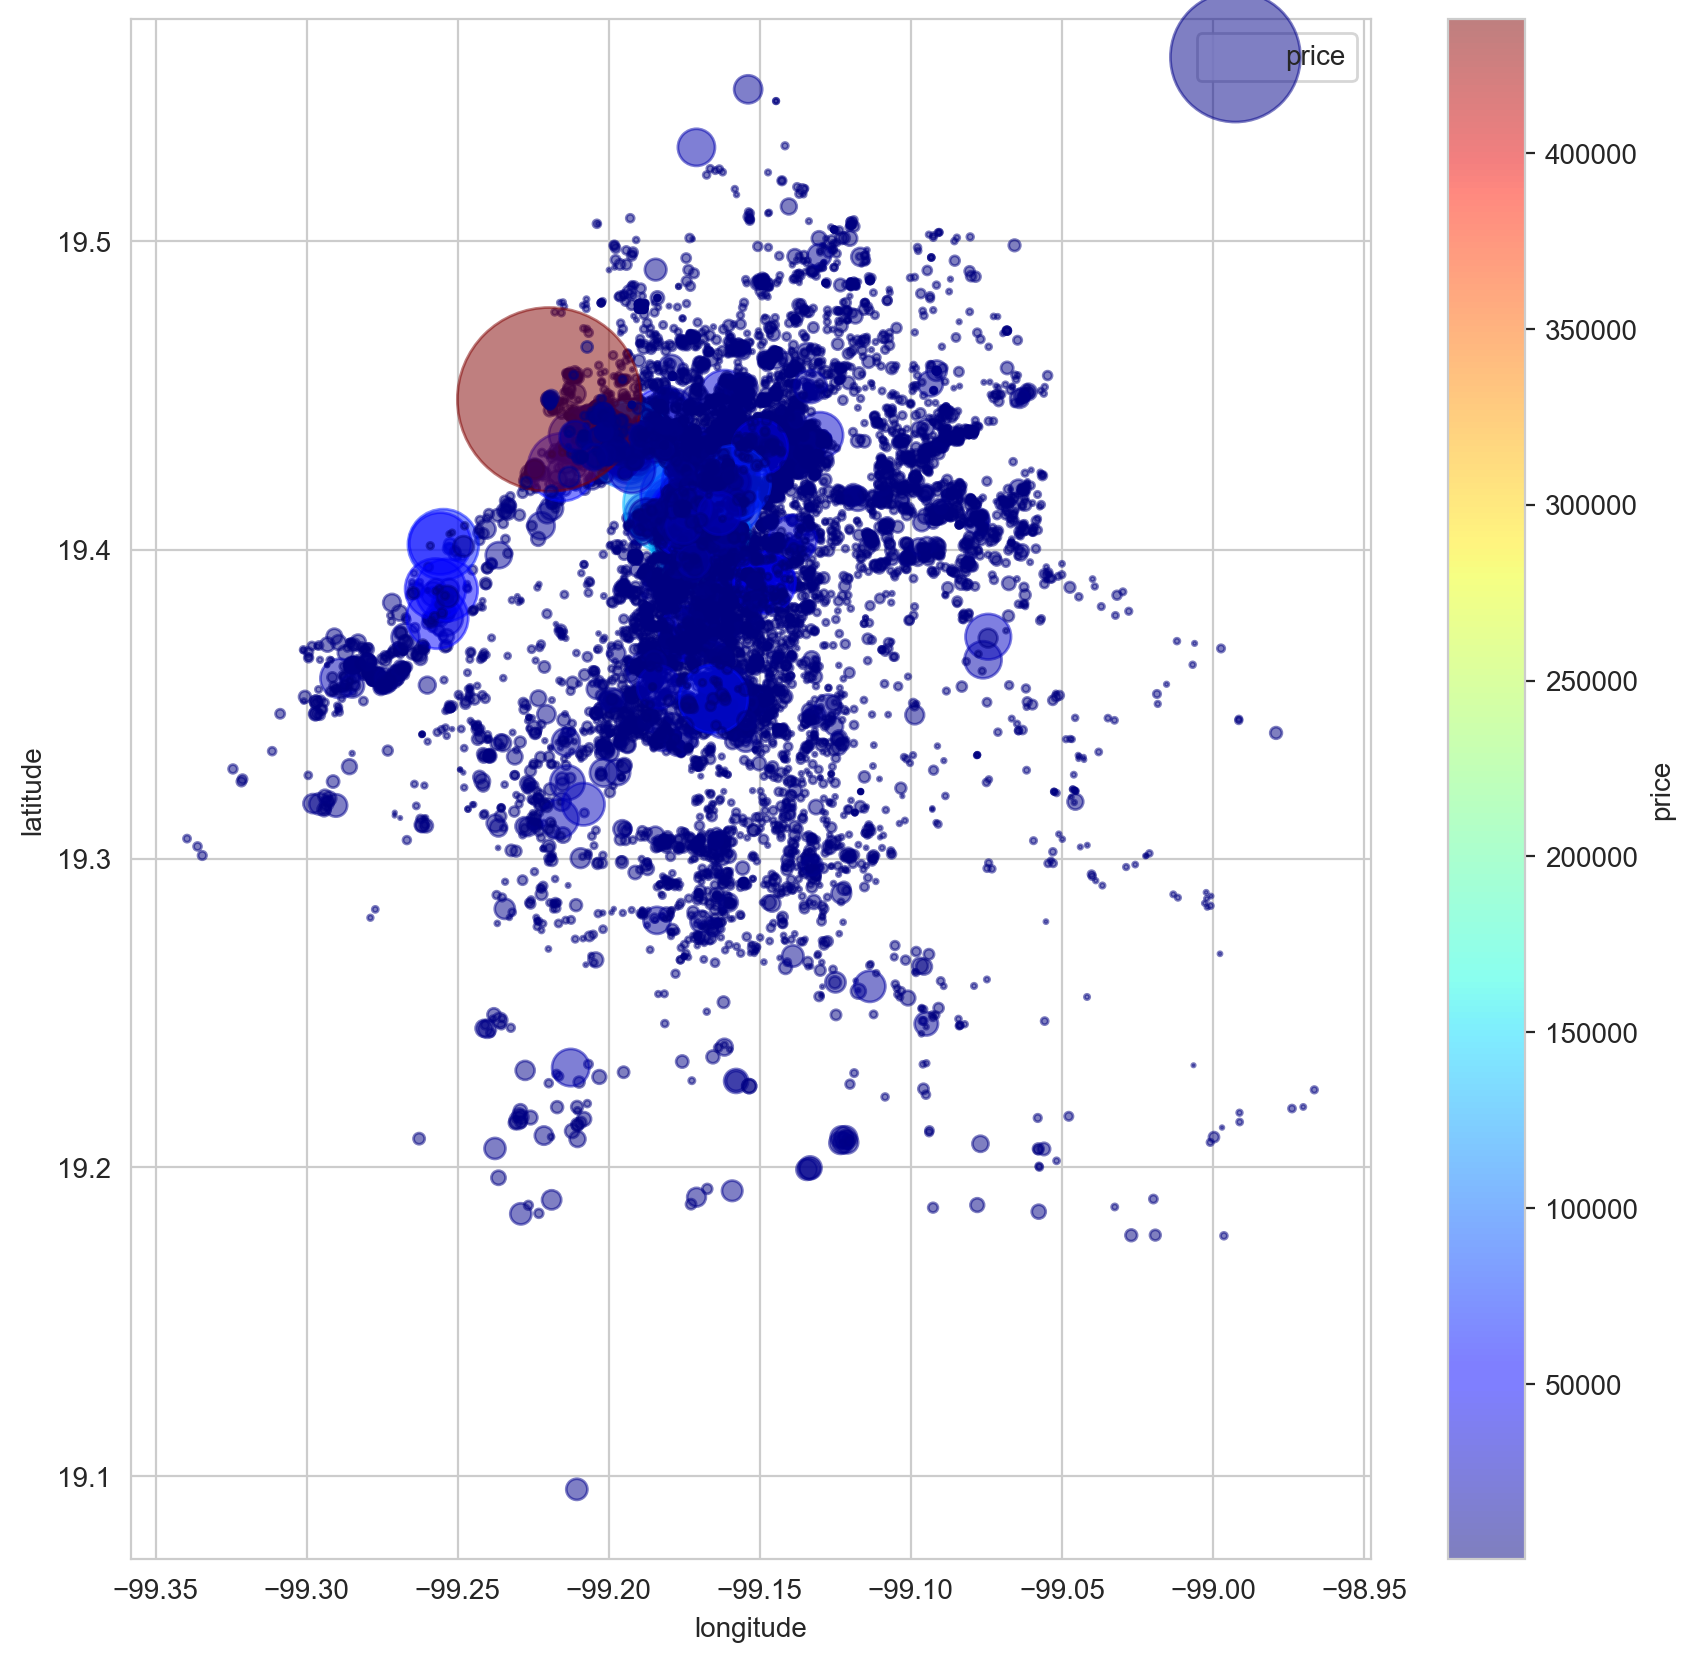

In [88]:
listings.plot(kind='scatter', 
            x='longitude', 
            y='latitude', 
            alpha=0.5, 
            s=listings['price']/100, 
            label="price", 
            figsize=(10, 10),
            c='price', 
            cmap=plt.get_cmap('jet'), 
            colorbar=True)

plt.legend()
plt.show()

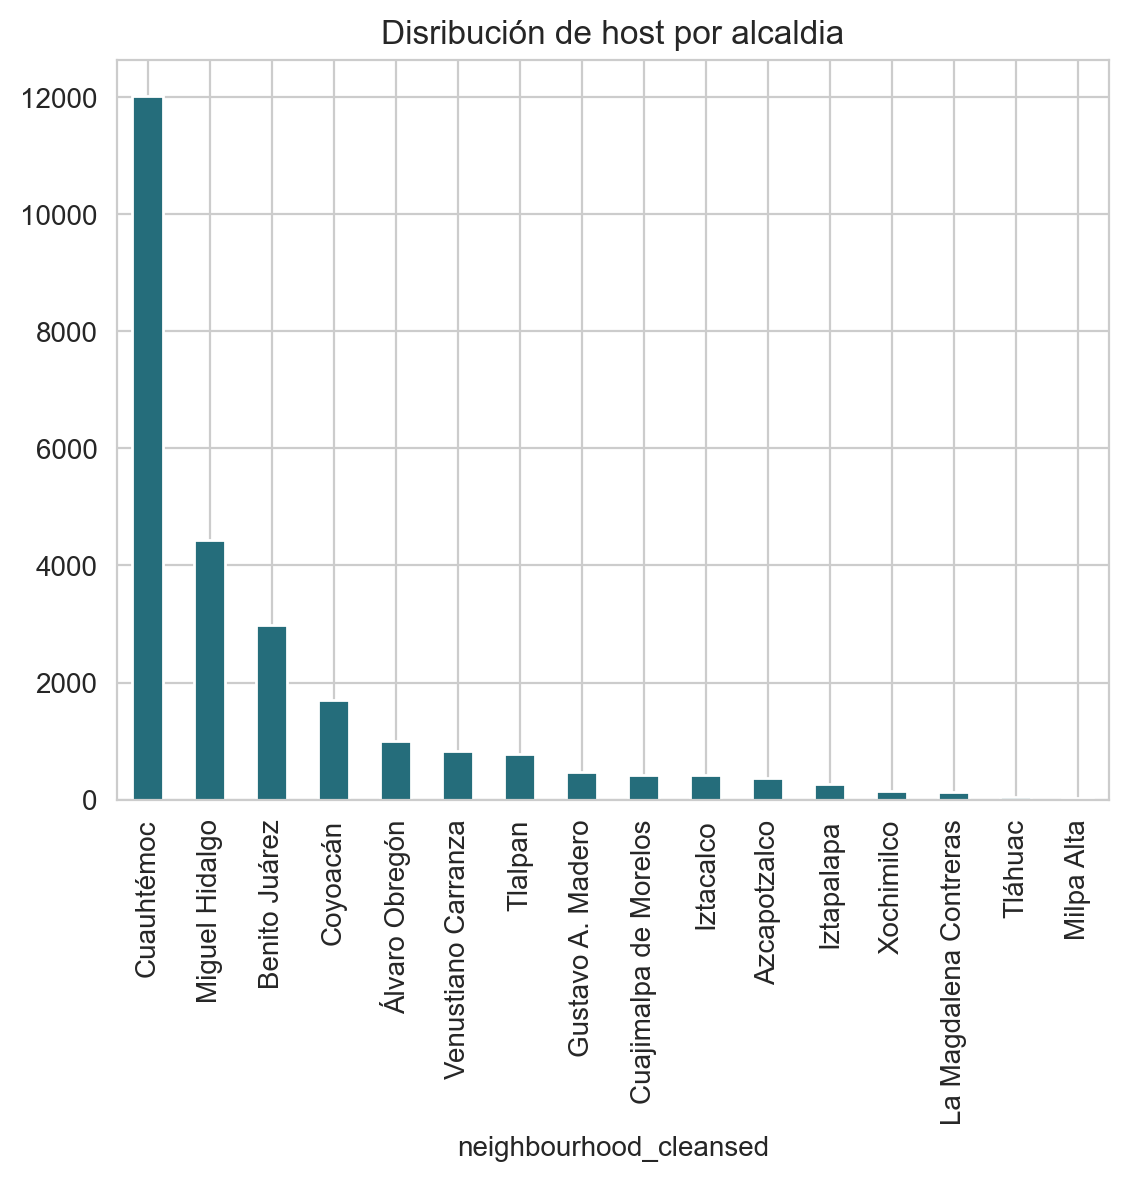

In [89]:
listings['neighbourhood_cleansed'].value_counts().plot(kind='bar', color='#256D7B')
plt.title('Disribución de host por alcaldia')
plt.show()

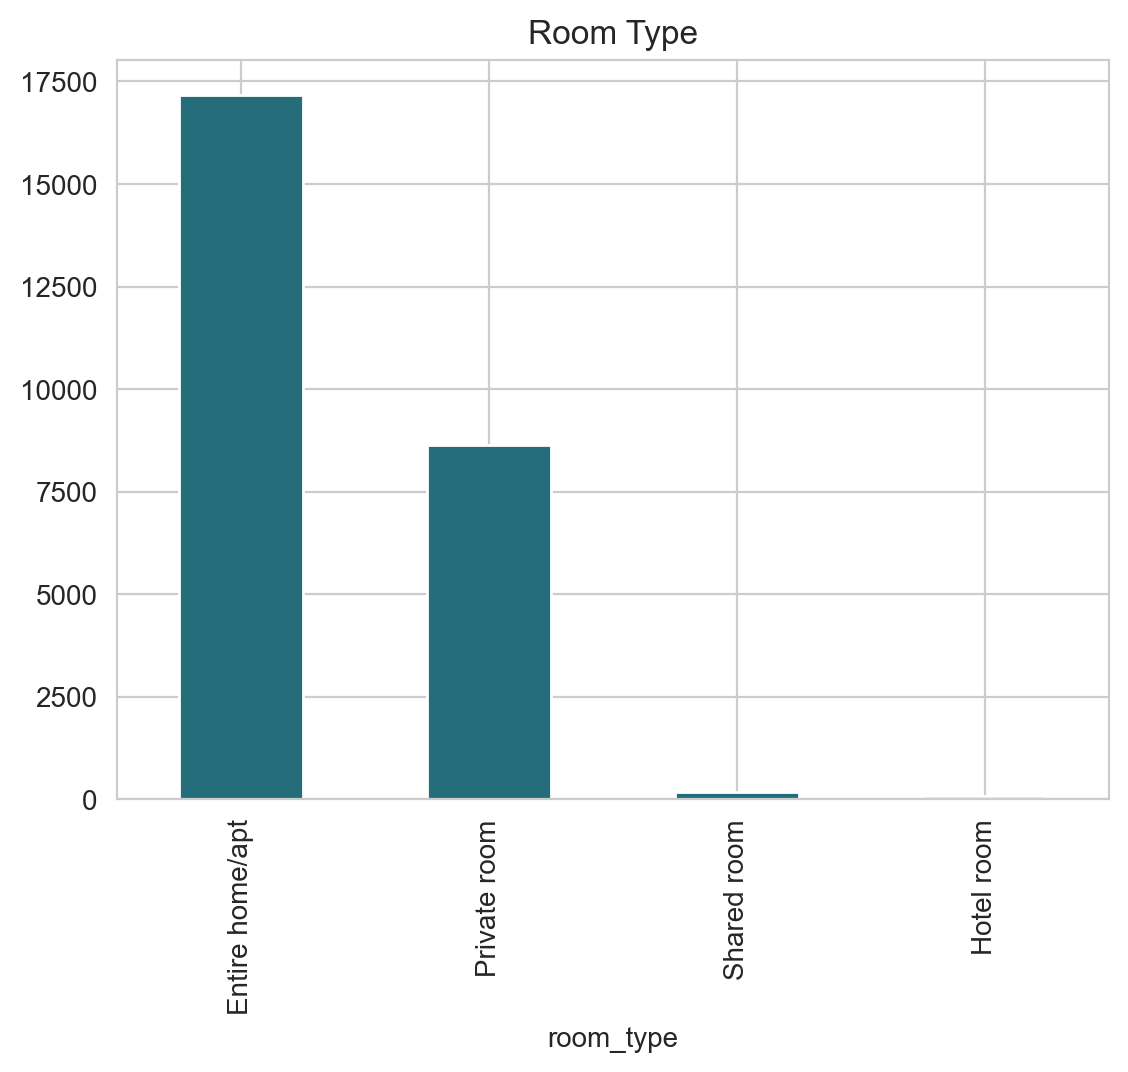

In [90]:
listings['room_type'].value_counts().plot(kind='bar', color='#256D7B')
plt.title('Room Type')
plt.show()

In [91]:
#cmap=sns.diverging_palette(h_neg=20, h_pos=220)

## Ingeniería de variables

In [92]:
# la columna contiene una lista de las verificaciones, se separa cada valor en cada columna
listings['host_verifications_email'] = listings['host_verifications'].map( lambda x: 1 if 'email' in str(x) else 0 )
listings['host_verifications_phone'] = listings['host_verifications'].map( lambda x: 1 if 'phone' in str(x) else 0 )
listings['host_verifications_workemail'] = listings['host_verifications'].map( lambda x: 1 if 'work_email' in str(x) else 0 )
# numero de verificaciones del host
listings['host_verifications_num'] = listings['host_verifications_email']+listings['host_verifications_phone']+listings['host_verifications_phone']

# variable que contiene una lista, se obtiene solo el numero de amenities que ofrece el host
listings['len_amenities'] = listings['amenities'].map(lambda x: len(str(x).split(',')))

# indica si el host se encuentra en mexico o no de acuerdo a la direccion
listings['host_in_location'] = listings['host_location'].map(lambda x: host_in_location(x))


Numero de cuartos

In [93]:
def get_n_bedrooms(room_type, bedrooms, n_beds):

    # si es privado es un cuarto
    if 'Private' in room_type or 'Entire' in room_type:
        return 1
    
    # si es compartido 
    if 'Shared' in room_type:
        return 0

    # si hay mas camas que cuartos, son compartidos
    if n_beds > bedrooms:
        return 0
    
    # si hay mas camas y es hotel, es cuarto compartido
    if n_beds > bedrooms or 'Hotel room' in room_type:
        return 0
    
    # es un cuarto privado de hotel
    if n_beds <= bedrooms or 'Hotel room' in room_type:
        return 0
    
    return bedrooms

In [94]:
listings['bedrooms_n'] = listings.apply( lambda x: get_n_bedrooms(x['room_type'], x['bedrooms'], x['beds']) , axis=1)

In [95]:
#listings[['room_type','bedrooms','bedrooms_n']]
listings[listings['bedrooms'].isna()][['room_type','bedrooms','bedrooms_n']].sample(10)

room_type  bedrooms  bedrooms_n
21543  Private room       NaN           1
5476   Private room       NaN           1
12503  Private room       NaN           1
8733   Private room       NaN           1
2208   Private room       NaN           1
21540  Private room       NaN           1
16798  Private room       NaN           1
11754  Private room       NaN           1
4729   Private room       NaN           1
4691   Private room       NaN           1

In [96]:
listings[listings['bedrooms_n'].isna()]

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, availability_eoy, number_of_reviews_ly, estimated_occupancy_l365d, estimated_revenue_l365d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, host_verifications_email, host_verifications_phone, host_verifications_workemail, host_verifications_num, len_amenities, host_in_location, bedrooms_n]
Index: []

Limpieza de numero de camas, puede que sea un cuarto con varias camas

In [97]:
def get_n_beds(room_type, beds):
    if float(beds) >= 0:
        return beds
    
    if room_type in ['Private room', 'Hotel room', 'Entire home/apt', 'Shared room']:
        return 1
    

In [98]:
listings['beds_n'] = listings.apply(lambda x: get_n_beds(x['room_type'], x['beds']), axis=1)

In [99]:
print(listings['beds_n'].isna().sum())

0


In [100]:
listings[listings['beds_n'].isna()]

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, availability_eoy, number_of_reviews_ly, estimated_occupancy_l365d, estimated_revenue_l365d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, host_verifications_email, host_verifications_phone, host_verifications_workemail, host_verifications_num, len_amenities, host_in_location, bedrooms_n, beds_n]
Index: []

Limpieza de datos para los registros de numeros de baños.

In [101]:
def get_n_bathrooms(value_int, value_txt):

    # Si no hay registro en ninguna de las dos columnas, devuelve 0
    if value_int is np.nan and value_txt is np.nan:
        return 0
    
    r = None
    
    try:
        r = float(value_txt.split(' ')[0])
        if value_int == np.nan:
            r = value_int
    except:
        r=0

    if value_int > r:
        r = value_int

    return r

In [102]:
listings['bathrooms_num'] = listings.apply( lambda x: get_n_bathrooms(x['bathrooms'], x['bathrooms_text']), axis=1)

In [103]:
#listings[(listings['bathrooms'].isna()) & (listings['bathrooms_text'].isna())][['bathrooms_text', 'bathrooms']]
#listings[(listings['bathrooms_text'].isna())][['bathrooms_text', 'bathrooms', 'bathrooms_test']].sample(10)

Identificar si el baño es compartido o privado

In [104]:
listings[['bathrooms_num', 'bathrooms_text', 'bedrooms']]

bathrooms_num  bathrooms_text  bedrooms
0               1.00          1 bath      1.00
1               5.50       5.5 baths      5.00
2               1.00          1 bath      1.00
3               1.00          1 bath      2.00
4               1.00          1 bath      1.00
...              ...             ...       ...
26062           1.00   1 shared bath       NaN
26063           1.00  1 private bath      1.00
26064           1.00   1 shared bath      1.00
26065           1.00          1 bath      1.00
26066           2.00         2 baths      2.00

[26067 rows x 3 columns]

In [105]:
def id_bath_priv(n_bathrooms, n_bedrooms):
    if n_bathrooms < n_bedrooms:
        return False

In [106]:
listings['bathrooms_text']

0                1 bath
1             5.5 baths
2                1 bath
3                1 bath
4                1 bath
              ...      
26062     1 shared bath
26063    1 private bath
26064     1 shared bath
26065            1 bath
26066           2 baths
Name: bathrooms_text, Length: 26067, dtype: object

In [107]:
# Normalized space for longitude and latitude
lat, lon = listings['latitude'], listings['longitude']
listings['geo_x'] = np.multiply(np.cos(lat), np.cos(lon))
listings['geo_y'] = np.multiply(np.cos(lat), np.sin(lon))
listings['geo_z'] = np.sin(lat)
##listings = listings.drop(['latitude', 'longitude'], axis=1)

## Clasificación de variables

In [108]:
# unidad muestral
um = ['id']

# variable objetivo (continua)
var_obj_num = ['price']

# variable objetivo (discreta) - clasificacion
var_obj_cat = ['instant_bookable']

# variables discretas/categoricas
var_disc = ['host_name', 'host_response_time', 'host_is_superhost', 
            'host_has_profile_pic',
            'host_identity_verified',  'neighbourhood_cleansed', 'property_type', 
            'room_type', 'has_availability', 'host_verifications_email', 
            'host_verifications_phone', 'host_verifications_workemail', 
            'host_in_location' ]

# variables continuas/numericas
var_cont = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 
            'host_total_listings_count', 
            #'latitude', 'longitude', 
            'geo_x', 'geo_y', 'geo_z',
            'accommodates', 
            'bedrooms_n', 'beds_n', 'minimum_nights', 'maximum_nights', 
            'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
            'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
            'availability_30', 'availability_60', 'availability_90', 'availability_365', 
            'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
            'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 
            'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 
            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 
            'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
            'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'len_amenities',
            'host_verifications_num', 'bathrooms_num' ]

# variables que son fecha
var_date =['host_since', 'calendar_last_scraped', 'first_review', 'last_review', ]

# variables que son texto
var_text = ['name', 'neighborhood_overview', 'description', 'picture_url', 'host_url', 
            'host_about', 'host_thumbnail_url', 'host_picture_url', 'amenities']

# variables no utilizadas
var_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'host_id', 
            'neighbourhood', 'calendar_updated', 'neighbourhood_group_cleansed', 'license',
            'host_verifications', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'host_location',
            'host_neighbourhood']


In [109]:
print( "len (lista de variables): ", len( um + var_obj_num + var_obj_cat + var_disc + var_cont + var_date + var_text + var_drop ))
print( "len (dataframe):  ", listings.shape )

len (lista de variables):  89
len (dataframe):   (26067, 91)


## Variables continuas

In [110]:
listings[ var_cont ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26067 entries, 0 to 26066
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            22563 non-null  float64
 1   host_acceptance_rate                          23328 non-null  float64
 2   host_listings_count                           26062 non-null  float64
 3   host_total_listings_count                     26062 non-null  float64
 4   geo_x                                         26067 non-null  float64
 5   geo_y                                         26067 non-null  float64
 6   geo_z                                         26067 non-null  float64
 7   accommodates                                  26067 non-null  int64  
 8   bedrooms_n                                    26067 non-null  int64  
 9   beds_n                                        26067 non-null 

In [111]:
listings[var_cont].isna().sum() / listings.shape[0] * 100

host_response_rate                             13.44
host_acceptance_rate                           10.51
host_listings_count                             0.02
host_total_listings_count                       0.02
geo_x                                           0.00
geo_y                                           0.00
geo_z                                           0.00
accommodates                                    0.00
bedrooms_n                                      0.00
beds_n                                          0.00
minimum_nights                                  0.00
maximum_nights                                  0.00
minimum_minimum_nights                          0.00
maximum_minimum_nights                          0.00
minimum_maximum_nights                          0.00
maximum_maximum_nights                          0.00
minimum_nights_avg_ntm                          0.00
maximum_nights_avg_ntm                          0.00
availability_30                               

In [112]:
listings[ var_cont ].describe( percentiles=[.01, .1, .25, .5, .75, .99], include='all')

host_response_rate  host_acceptance_rate  host_listings_count  \
count           22,563.00             23,328.00            26,062.00   
mean                93.88                 88.88                25.90   
std                 19.94                 24.65                86.77   
min                  0.00                  0.00                 1.00   
1%                   0.00                  0.00                 1.00   
10%                 89.00                 60.00                 1.00   
25%                100.00                 94.00                 1.00   
50%                100.00                 99.00                 4.00   
75%                100.00                100.00                14.00   
99%                100.00                100.00               442.00   
max                100.00                100.00               886.00   

       host_total_listings_count     geo_x     geo_y     geo_z  accommodates  \
count                  26,062.00 26,067.00 26,067.00 26,067.00     26,067.00   
mean                       35.07      0.17      0.83      0.53          3.35   
std                       123.98      0.03      0.02      0.04          2.36   
min                         1.00      0.00      0.74      0.24          1.00   
1%                          1.00      0.09      0.79      0.41          1.00   
10%                         1.00      0.15      0.81      0.48          1.00   
25%                         2.00      0.16      0.82      0.52          2.00   
50%                         5.00      0.17      0.83      0.54          2.00   
75%                        17.00      0.18      0.84      0.55          4.00   
99%                       913.00      0.27      0.90      0.59         15.00   
max                     1,049.00      0.33      0.95      0.65         16.00   

       bedrooms_n    beds_n  minimum_nights  maximum_nights  \
count   26,067.00 26,067.00       26,067.00       26,067.00   
mean         0.99      1.81            4.79          497.85   
std          0.10      1.65           25.09          409.42   
min          0.00      0.00            1.00            1.00   
1%           1.00      0.00            1.00            6.00   
10%          1.00      1.00            1.00           30.00   
25%          1.00      1.00            1.00          180.00   
50%          1.00      1.00            2.00          365.00   
75%          1.00      2.00            2.00        1,125.00   
99%          1.00      8.00           40.00        1,125.00   
max          1.00     50.00        1,125.00        1,127.00   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count               26,067.00               26,067.00               26,067.00   
mean                     4.33                    4.86               83,078.23   
std                     24.44                   24.86           13,300,997.11   
min                      1.00                    1.00                    1.00   
1%                       1.00                    1.00                    3.00   
10%                      1.00                    1.00                   45.00   
25%                      1.00                    1.00                  365.00   
50%                      1.00                    2.00                  730.00   
75%                      2.00                    3.00                1,125.00   
99%                     31.00                   52.68                1,125.00   
max                  1,125.00                1,125.00        2,147,483,647.00   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count               26,067.00               26,067.00               26,067.00   
mean                83,105.27                    4.55               83,091.16   
std             13,300,996.94                   24.54           13,300,997.03   
min                      1.00                    1.00                    1.00   
1%                       7.00                 

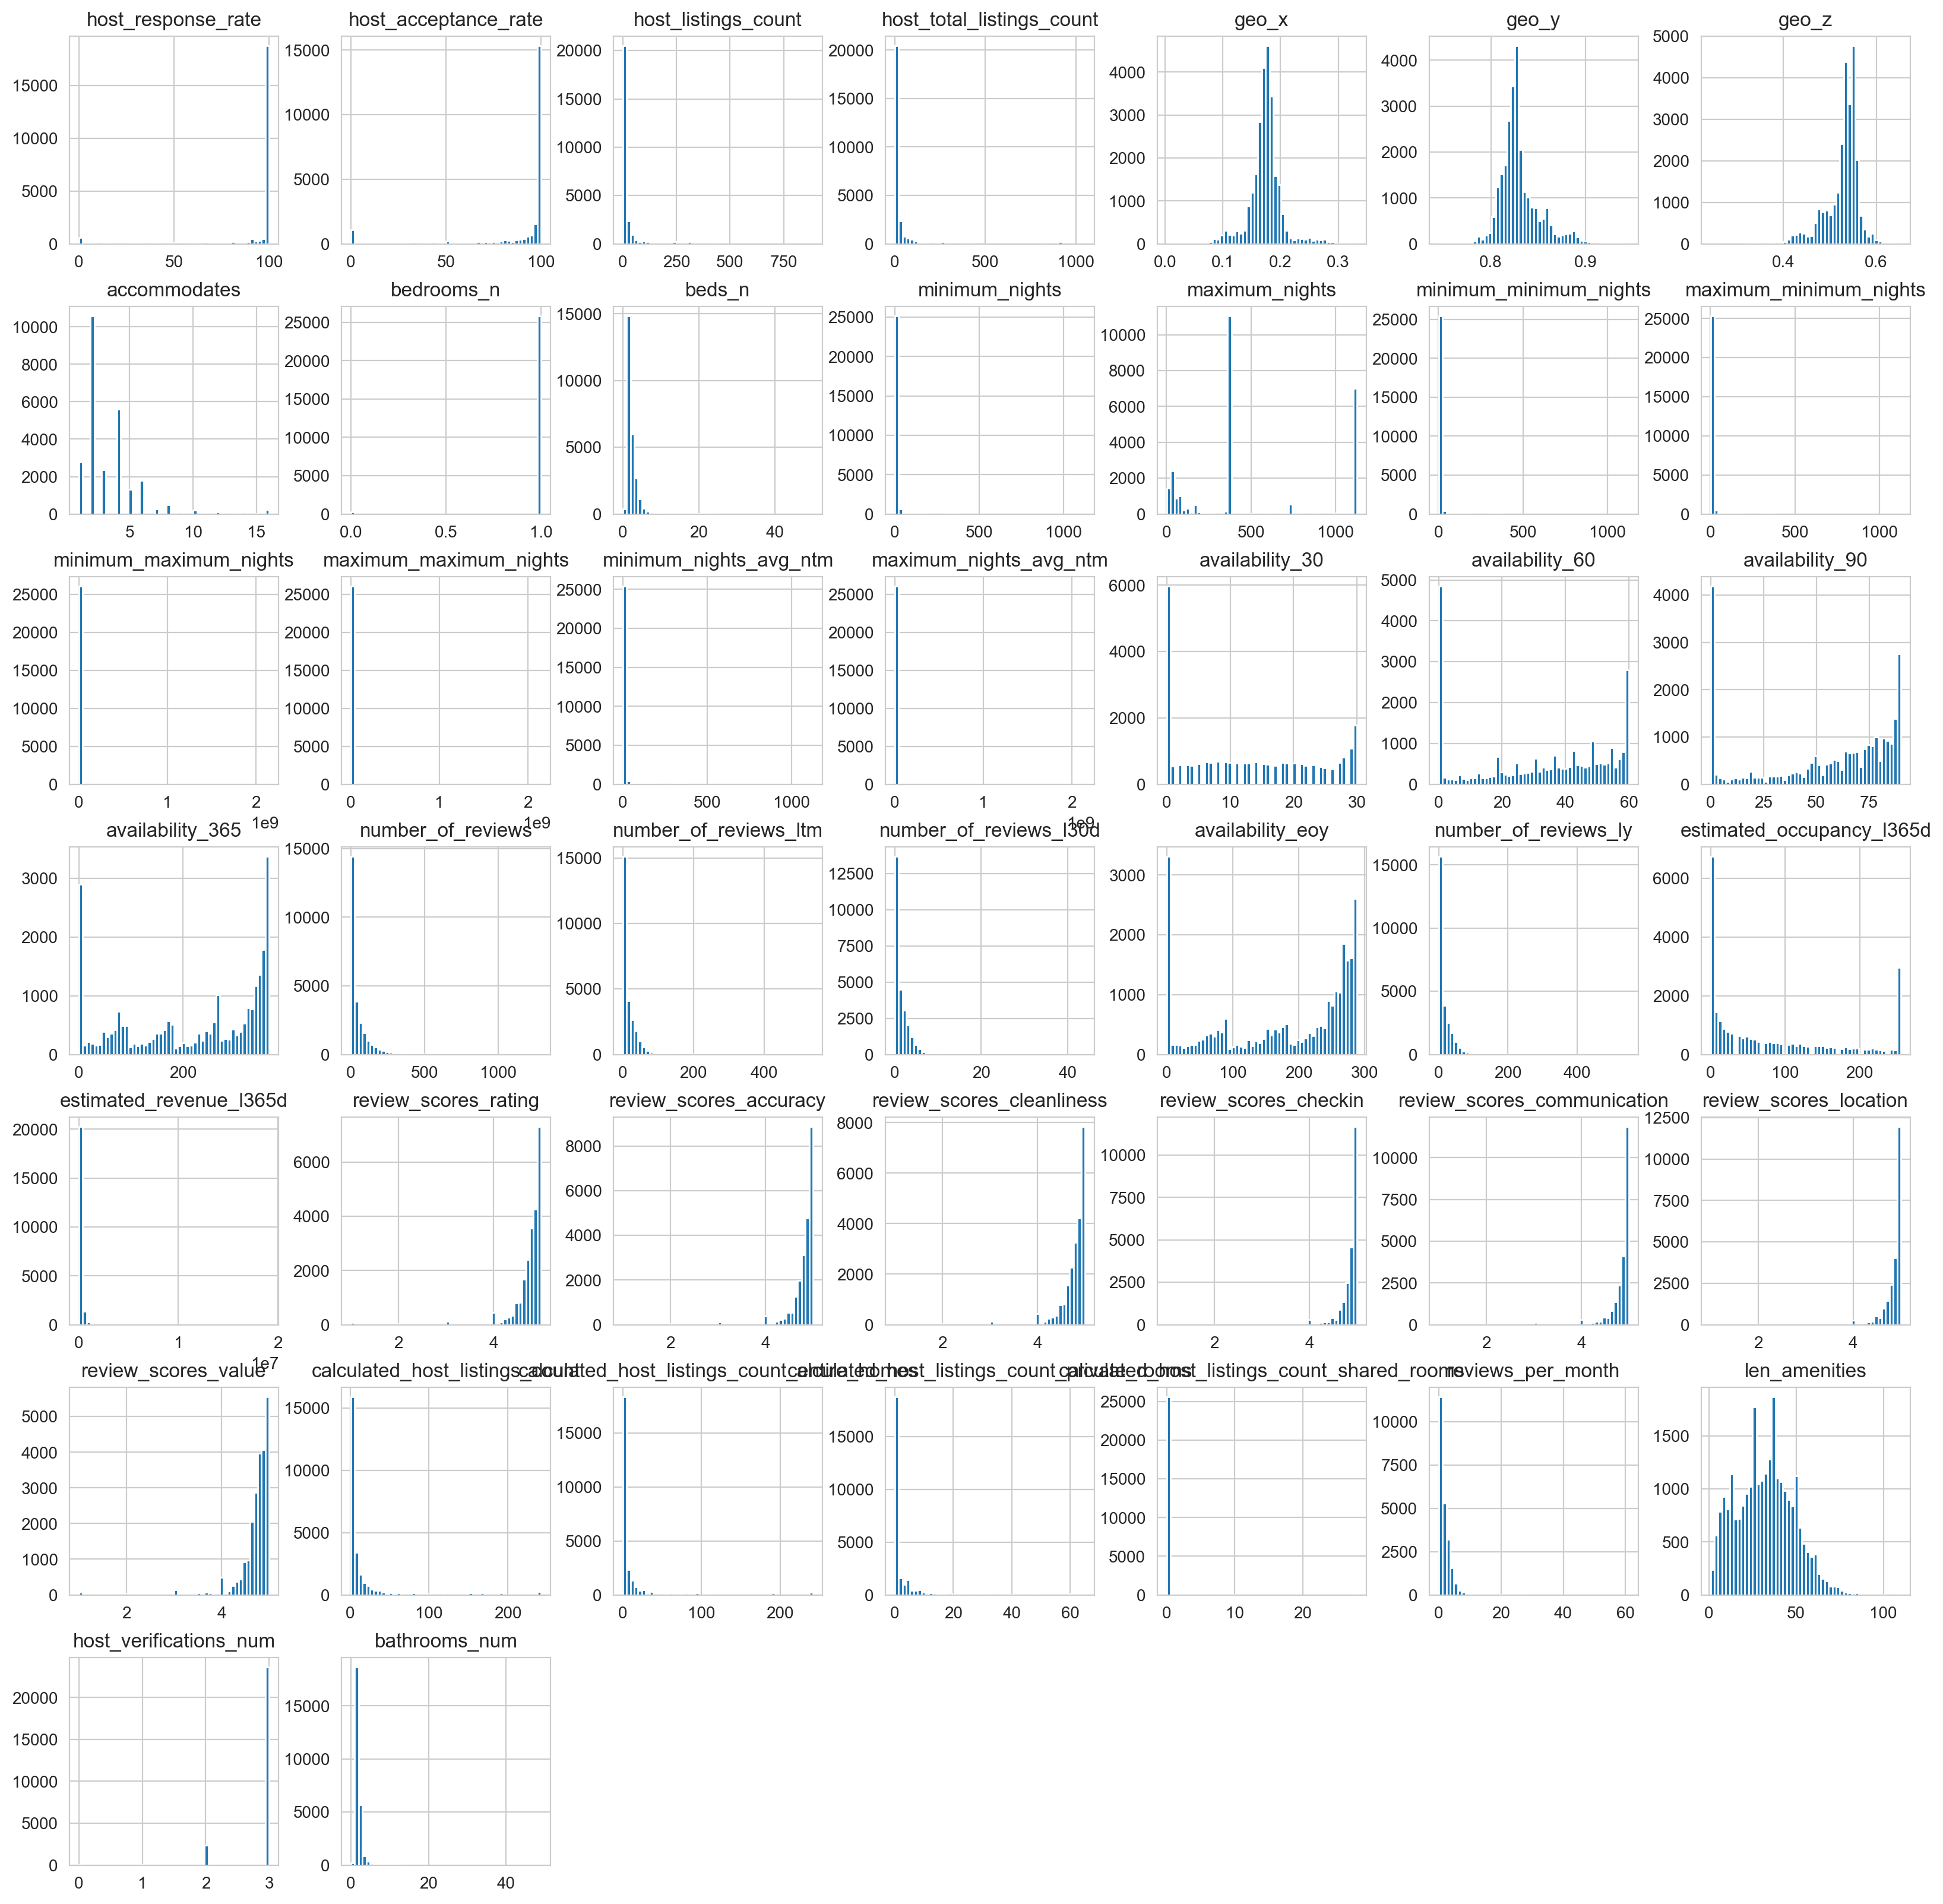

In [113]:
listings[ var_cont ].hist(bins=50, figsize=(20,20))
plt.show()

#### Valores faltantes

In [114]:
aux = pd.DataFrame(listings[var_cont].isna().sum())
aux = aux.sort_values(by=0).reset_index()
aux[aux[0] > 0]

index     0
31          host_listings_count     5
32    host_total_listings_count     5
33         host_acceptance_rate  2739
34         review_scores_rating  3261
35            reviews_per_month  3261
36       review_scores_accuracy  3262
37       review_scores_location  3262
38  review_scores_communication  3262
39        review_scores_checkin  3262
40    review_scores_cleanliness  3262
41          review_scores_value  3262
42           host_response_rate  3504
43      estimated_revenue_l365d  3999

In [115]:
listings['host_listings_count'] = listings['host_listings_count'].fillna(0)
listings['host_total_listings_count'] = listings['host_total_listings_count'].fillna(0)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].median())
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(int(listings['review_scores_rating'].mode()))
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].fillna(int(listings['review_scores_accuracy'].median()))
listings['review_scores_location'] = listings['review_scores_location'].fillna(int(listings['review_scores_location'].median()))
listings['review_scores_communication'] = listings['review_scores_communication'].fillna(int(listings['review_scores_communication'].median()))
listings['review_scores_checkin'] = listings['review_scores_checkin'].fillna(int(listings['review_scores_checkin'].median()))
listings['review_scores_cleanliness'] = listings['review_scores_cleanliness'].fillna(int(listings['review_scores_cleanliness'].median()))
listings['review_scores_value'] = listings['review_scores_value'].fillna(int(listings['review_scores_value'].median()))
listings['host_response_rate'] = listings['host_response_rate'].fillna(int(listings['host_response_rate'].median()))
listings['estimated_revenue_l365d'] = listings['estimated_revenue_l365d'].fillna(listings['estimated_revenue_l365d'].mean())

In [116]:
listings[var_cont].isna().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
geo_x                                           0
geo_y                                           0
geo_z                                           0
accommodates                                    0
bedrooms_n                                      0
beds_n                                          0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0


In [117]:
listings = listings[ ~(listings['minimum_nights'] > listings['minimum_nights'].quantile(.999)) ]
listings.shape

(26059, 91)

In [118]:
listings = listings[ ~(listings['minimum_maximum_nights'] > listings['minimum_maximum_nights'].quantile(.999)) ]
listings.shape

(26057, 91)

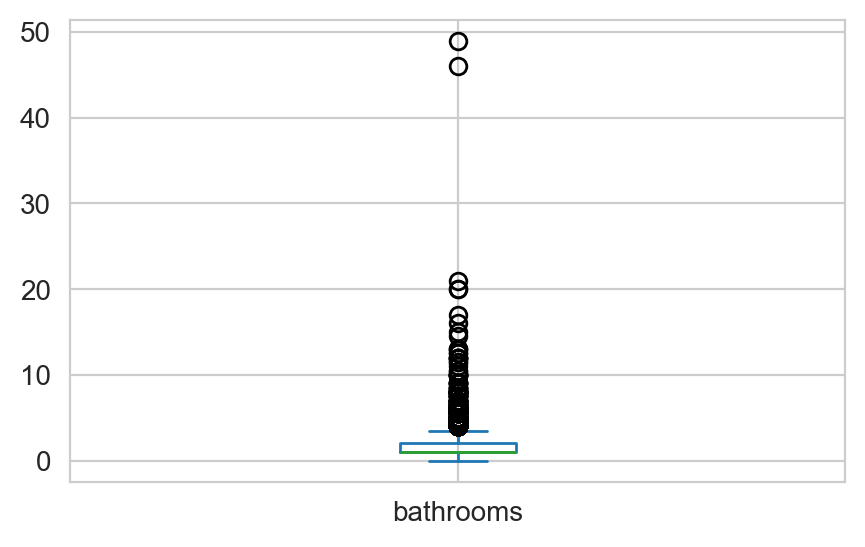

np.float64(10.5)

In [119]:
plt.figure( figsize=(5, 3) )
listings[ 'bathrooms' ].plot(kind='box')
plt.show()
listings[ 'bathrooms' ].quantile(.999)

<Figure size 1000x1000 with 0 Axes>

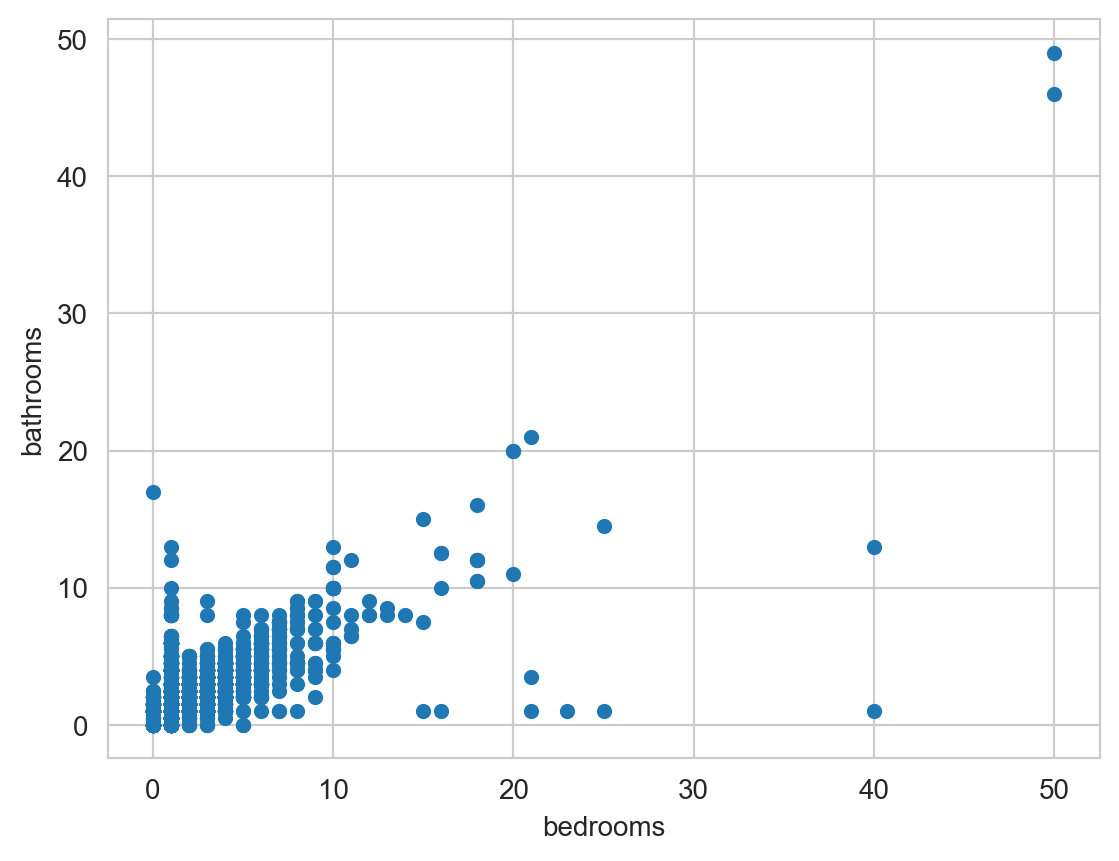

In [120]:
plt.figure(figsize=(10, 10))
listings[ ['bedrooms', 'bathrooms'] ].plot(kind='scatter', x='bedrooms', y='bathrooms')
plt.show()

In [121]:
# listings[ (listings['bathrooms'] > listings['bathrooms'].quantile(.999)) ]

In [122]:
listings[ var_cont ].describe( percentiles=[.01, .1, .25, .5, .75, .99], include='all')

host_response_rate  host_acceptance_rate  host_listings_count  \
count           26,057.00             26,057.00            26,057.00   
mean                94.70                 89.94                25.90   
std                 18.67                 23.53                86.77   
min                  0.00                  0.00                 0.00   
1%                   0.00                  0.00                 1.00   
10%                 90.00                 67.00                 1.00   
25%                100.00                 96.00                 1.00   
50%                100.00                 99.00                 4.00   
75%                100.00                100.00                14.00   
99%                100.00                100.00               442.00   
max                100.00                100.00               886.00   

       host_total_listings_count     geo_x     geo_y     geo_z  accommodates  \
count                  26,057.00 26,057.00 26,057.00 26,057.00     26,057.00   
mean                       35.08      0.17      0.83      0.53          3.35   
std                       124.00      0.03      0.02      0.04          2.36   
min                         0.00      0.00      0.74      0.24          1.00   
1%                          1.00      0.09      0.79      0.41          1.00   
10%                         1.00      0.15      0.81      0.48          1.00   
25%                         2.00      0.16      0.82      0.52          2.00   
50%                         5.00      0.17      0.83      0.54          2.00   
75%                        17.00      0.18      0.84      0.55          4.00   
99%                       913.00      0.27      0.90      0.59         15.00   
max                     1,049.00      0.33      0.95      0.65         16.00   

       bedrooms_n    beds_n  minimum_nights  maximum_nights  \
count   26,057.00 26,057.00       26,057.00       26,057.00   
mean         0.99      1.81            4.59          497.61   
std          0.10      1.65           22.06          409.32   
min          0.00      0.00            1.00            1.00   
1%           1.00      0.00            1.00            6.00   
10%          1.00      1.00            1.00           30.00   
25%          1.00      1.00            1.00          180.00   
50%          1.00      1.00            2.00          365.00   
75%          1.00      2.00            2.00        1,125.00   
99%          1.00      8.00           31.00        1,125.00   
max          1.00     50.00          365.00        1,125.00   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count               26,057.00               26,057.00               26,057.00   
mean                     4.13                    4.66                  694.88   
std                     21.30                   21.80                  443.79   
min                      1.00                    1.00                    1.00   
1%                       1.00                    1.00                    3.00   
10%                      1.00                    1.00                   45.00   
25%                      1.00                    1.00                  365.00   
50%                      1.00                    2.00                  730.00   
75%                      2.00                    3.00                1,125.00   
99%                     30.00                   45.00                1,125.00   
max                    365.00                  365.00                1,125.00   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count               26,057.00               26,057.00               26,057.00   
mean                   721.92                    4.35                  707.81   
std                    481.72                   21.42                  460.64   
min                      1.00                    1.00                    1.00   
1%                       7.00                 

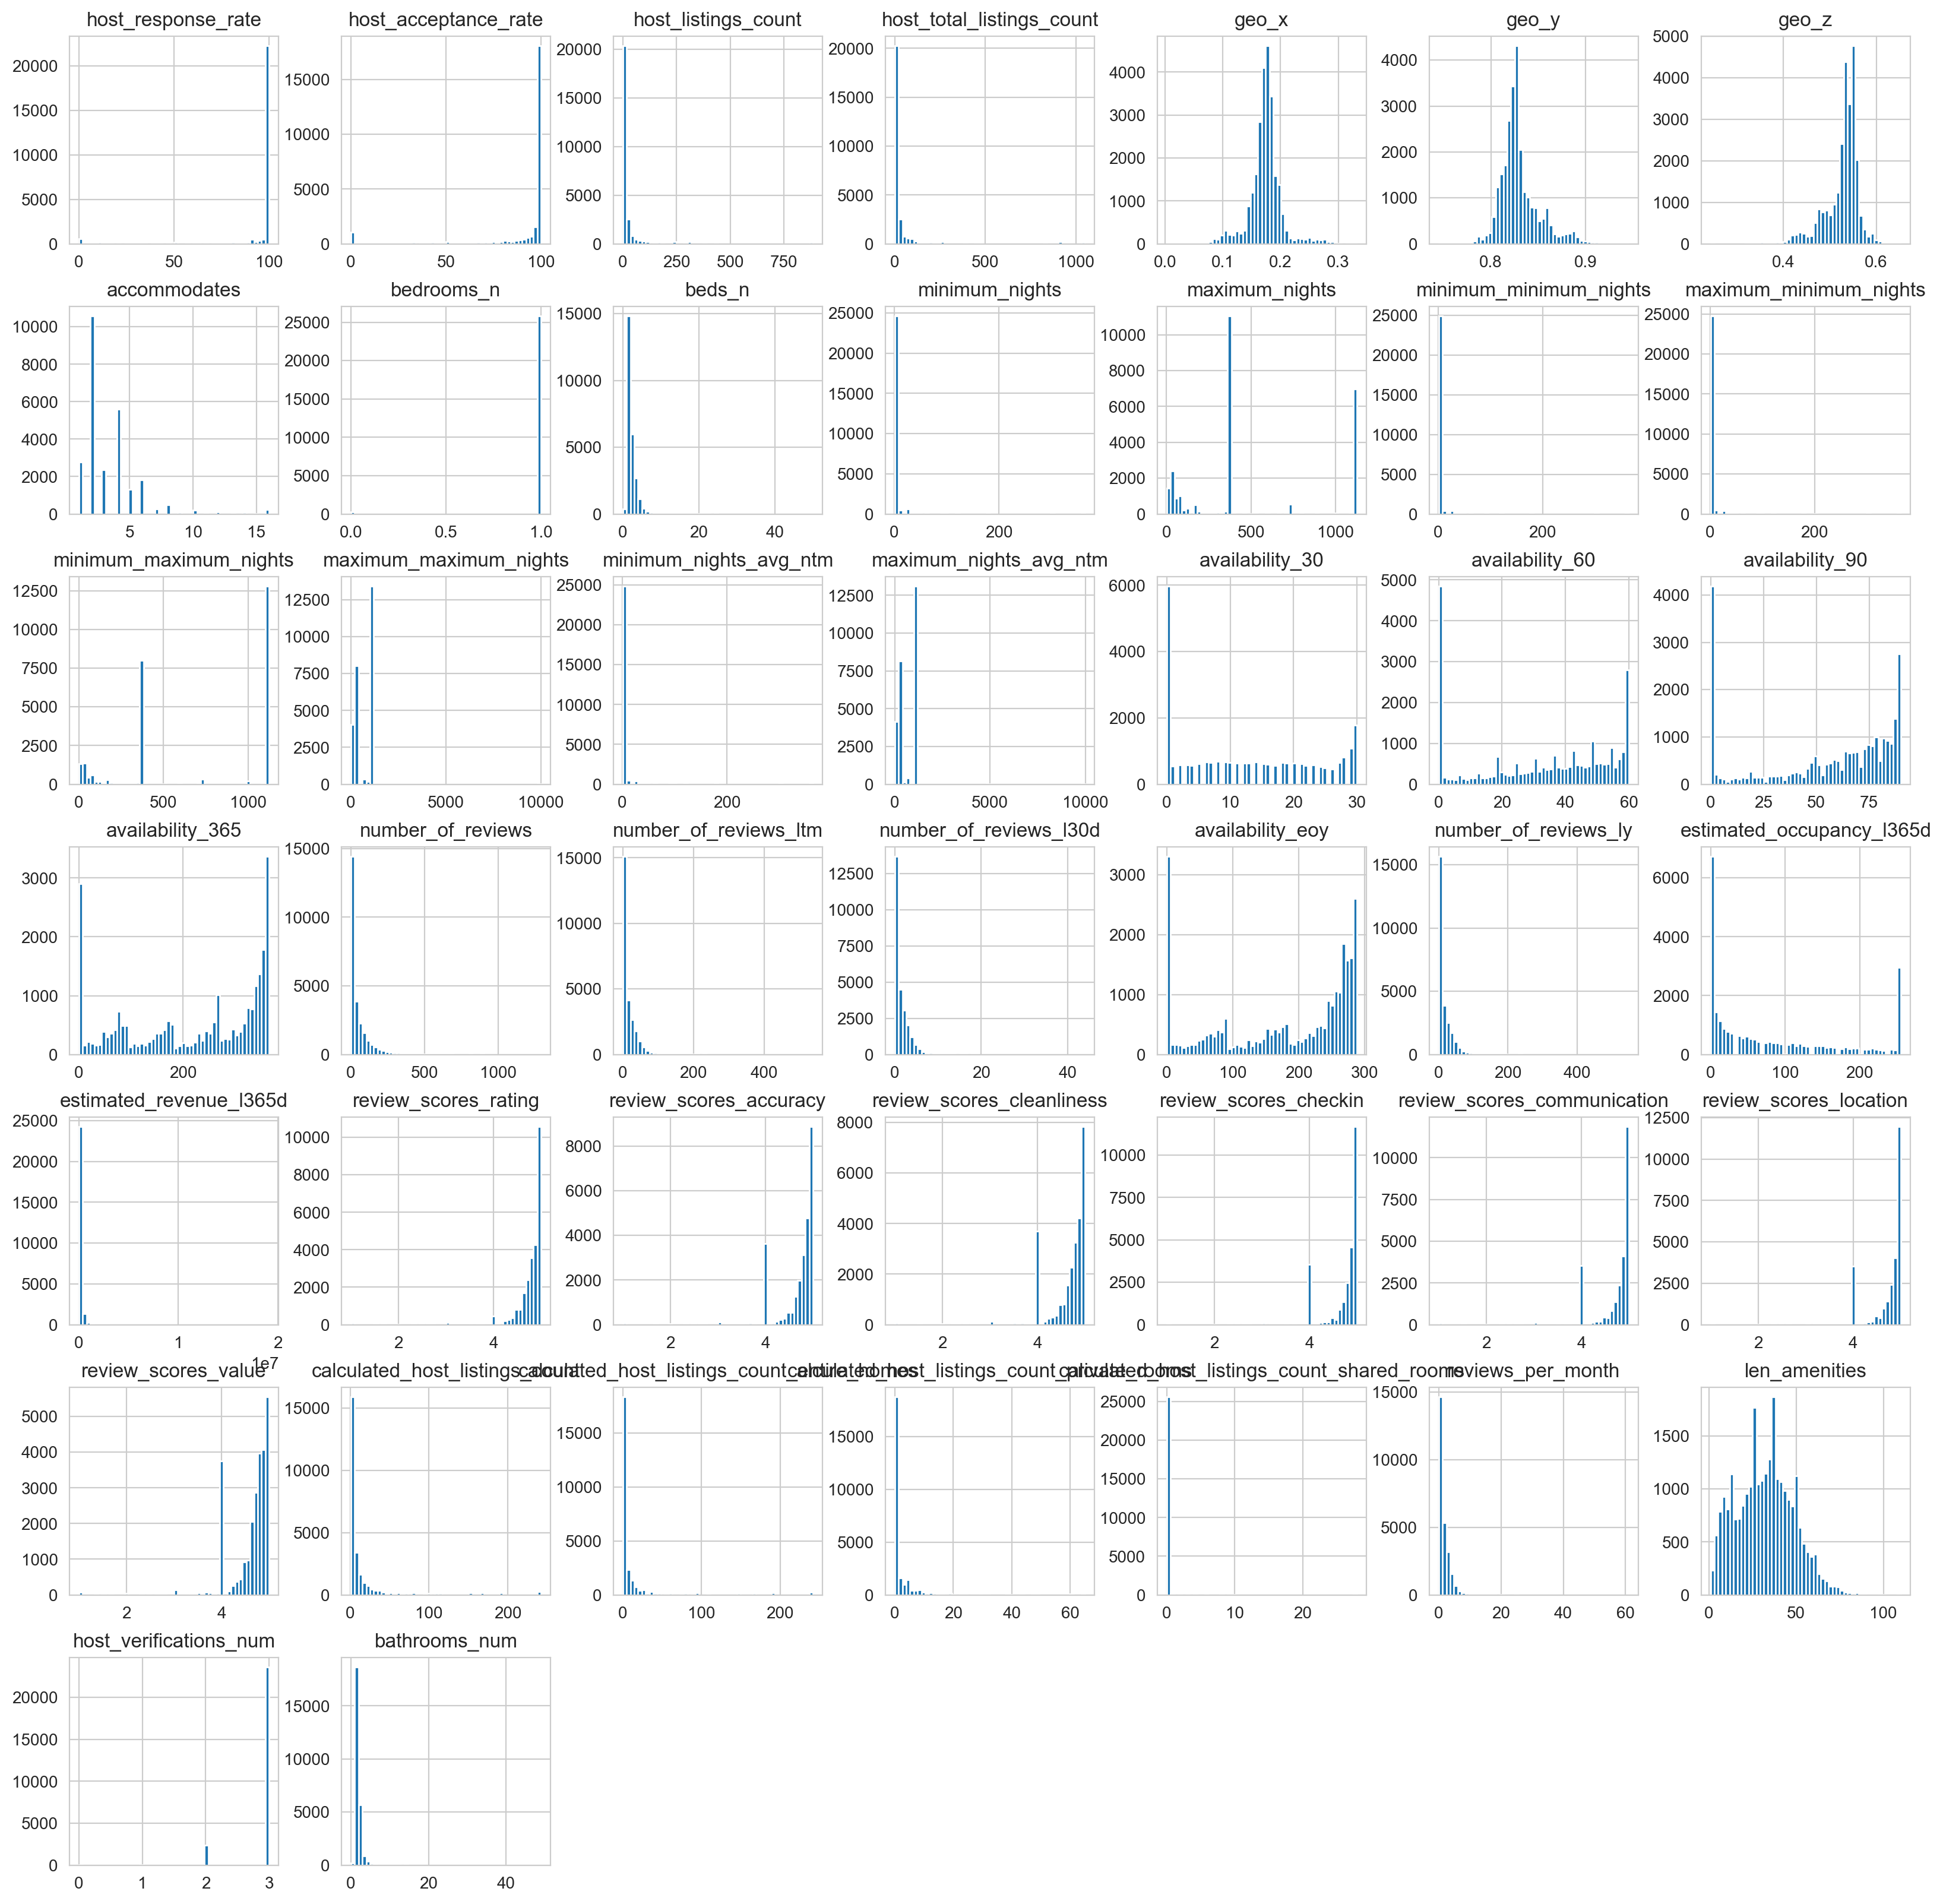

In [123]:
listings[ var_cont ].hist(bins=50, figsize=(20,20))
plt.show()

## Variables objetivo numerica

Como variable objetivo discreta se establece los datos de la variable 'price', ya que es un dato continuo que varia entre cada uno de los registros.

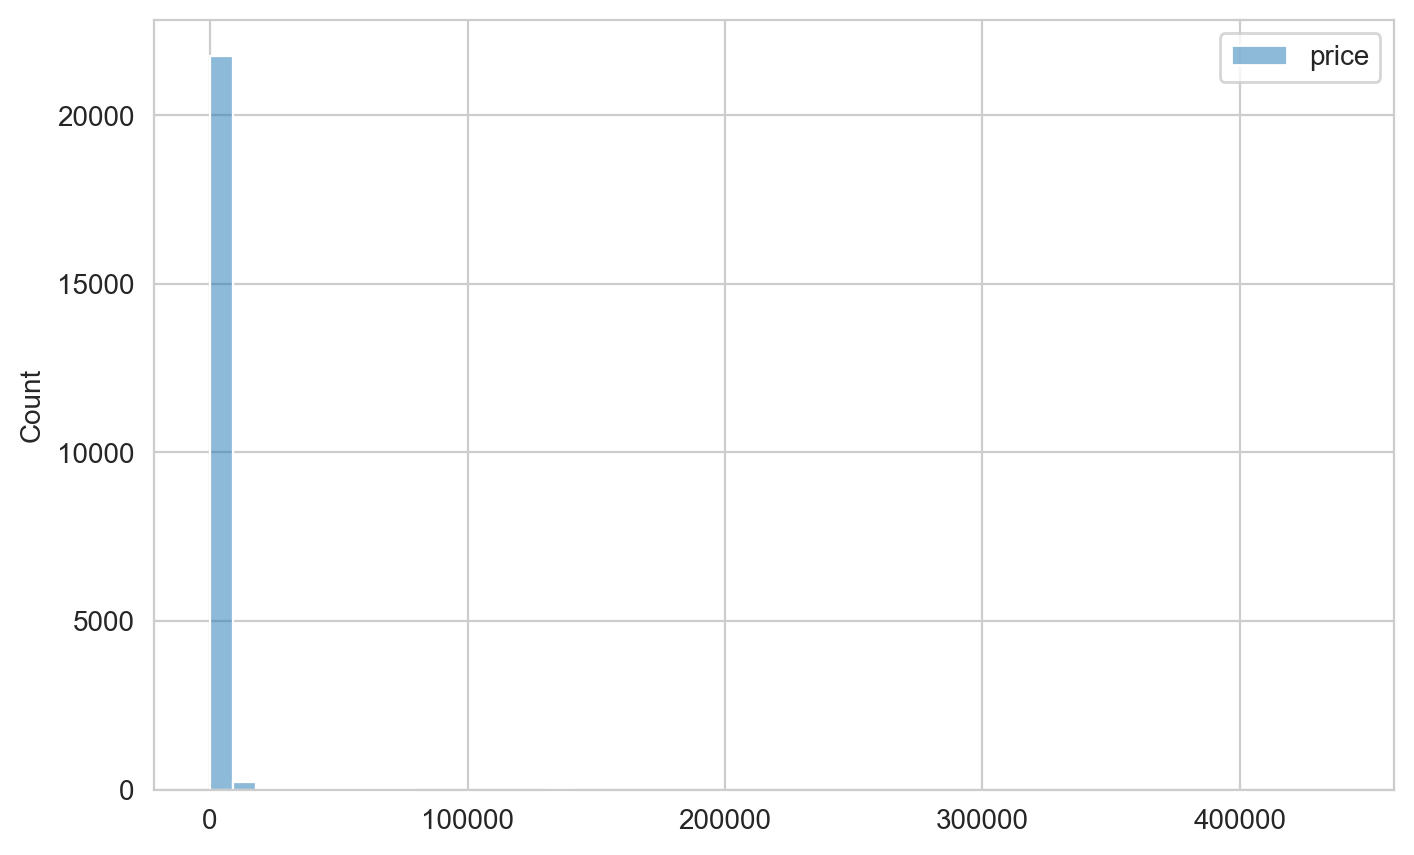

count    22,066.00
mean      1,665.09
std       4,343.51
min         116.00
1%          221.00
25%         630.00
50%       1,055.00
75%       1,722.00
99%      10,881.30
99.9%    47,987.00
max     438,053.00
Name: price, dtype: float64

In [124]:
plt.figure( figsize=(8, 5) )
sns.histplot( listings[ var_obj_num ] , bins=50)
plt.show()
listings[ var_obj_num[0] ].describe(percentiles=[0.01, .25, .5, .75, .99, .999])

In [125]:
# Registro con el valor mas alto
listings[ listings[var_obj_num[0]] == 438053.00 ]

id                                       listing_url  \
24145  1303619093372835080  https://www.airbnb.com/rooms/1303619093372835080   

            scrape_id last_scraped       source  \
24145  20250319150644   2025-03-21  city scrape   

                                             name  \
24145  Navidad en Depto. Premium Cerca de Polanco   

                                             description  \
24145  The Carso Condominiums, shielded under the ren...   

      neighborhood_overview  \
24145                   NaN   

                                             picture_url    host_id  \
24145  https://a0.muscache.com/pictures/prohost-api/H...  104400812   

                                          host_url host_name host_since  \
24145  https://www.airbnb.com/users/show/104400812    Stefan 2016-11-19   

             host_location                                         host_about  \
24145  Mexico City, Mexico  Soy una persona alegre, divertida y cuidadosa....   

      host_response_time  host_response_rate  host_acceptance_rate  \
24145     within an hour               96.00                 99.00   

      host_is_superhost                                 host_thumbnail_url  \
24145                 f  https://a0.muscache.com/im/pictures/user/User/...   

                                        host_picture_url host_neighbourhood  \
24145  https://a0.muscache.com/im/pictures/user/User/...           Santa Fe   

       host_listings_count  host_total_listings_count  host_verifications  \
24145                22.00                      28.00  ['email', 'phone']   

      host_has_profile_pic host_identity_verified neighbourhood  \
24145                    t                      t           NaN   

      neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  \
24145         Miguel Hidalgo                           NaN     19.45   

       longitude       property_type        room_type  accommodates  \
24145     -99.22  Entire rental unit  Entire home/apt             3   

       bathrooms bathrooms_text  bedrooms  beds  \
24145       1.50      1.5 baths      1.00  2.00   

                                               amenities      price  \
24145  ["Wifi", "Pool", "Self check-in", "Free parkin... 438,053.00   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
24145               1              90                       1   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
24145                       1                    1125                    1125   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
24145                    1.00                1,125.00               NaN   

      has_availability  availability_30  availability_60  availability_90  \
24145                t                0                0                0   

       availability_365 calendar_last_scraped  number_of_reviews  \
24145                45            2025-03-21                  3   

       number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  \
24145                      3                       0                 0   

       number_of_reviews_ly  estimated_occupancy_l365d  \
24145                     1                         18   

       estimated_revenue_l365d first_review last_review  review_scores_rating  \
24145             7,884,954.00   2024-12-28  2025-02-06                  5.00   

       review_scores_accuracy  review_scores_cleanliness  \
24145                    5.00                       5.00   

       review_scores_checkin  review_scores_communication  \
24145                   5.00                         5.00   

       review_scores_location  review_scores_value  license instant_bookable  \
24145                    5.00                 5.00      NaN                t   

       calculated_host_listings_count  \
24145                              21   

       calculated_host_listings_count_entire_homes  \
24145                  

In [126]:
listings.shape

(26057, 91)

In [127]:
listings[ listings['price'] > listings['price'].quantile(.99) ].shape

(221, 91)

In [128]:
listings[listings['price'] <= listings['price'].quantile(.99)].shape

(21845, 91)

In [129]:
listings[ ~(listings['price'] > listings['price'].quantile(.99))].shape

(25836, 91)

In [130]:
#listings = listings[ ~(listings['price'] > listings['price'].quantile(.8))]
#listings.shape

In [131]:
listings = listings[ ~(listings['price'] > listings['price'].quantile(.9))]
listings.shape

(23850, 91)

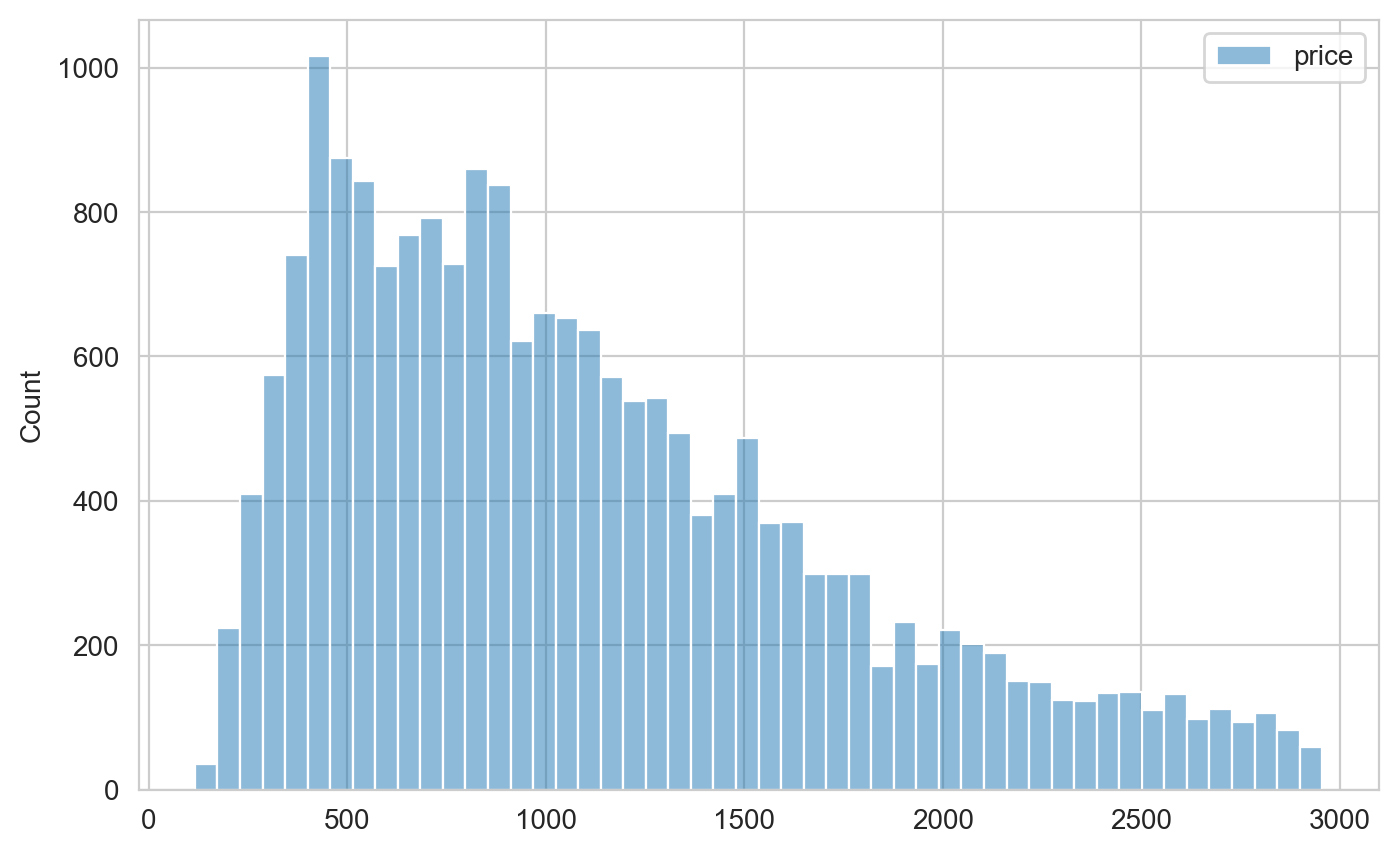

In [168]:
plt.figure( figsize=(8, 5) )
sns.histplot( listings[ var_obj_num ], bins=50, color='#256D7B')
plt.show()

In [133]:
listings['price'].describe()

count   19,859.00
mean     1,095.76
std        633.99
min        116.00
25%        592.00
50%        956.00
75%      1,472.00
max      2,956.00
Name: price, dtype: float64

3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]
pandas 2.2.3
geopandas 1.0.1
numpy 2.2.3
matplotlib 3.10.0


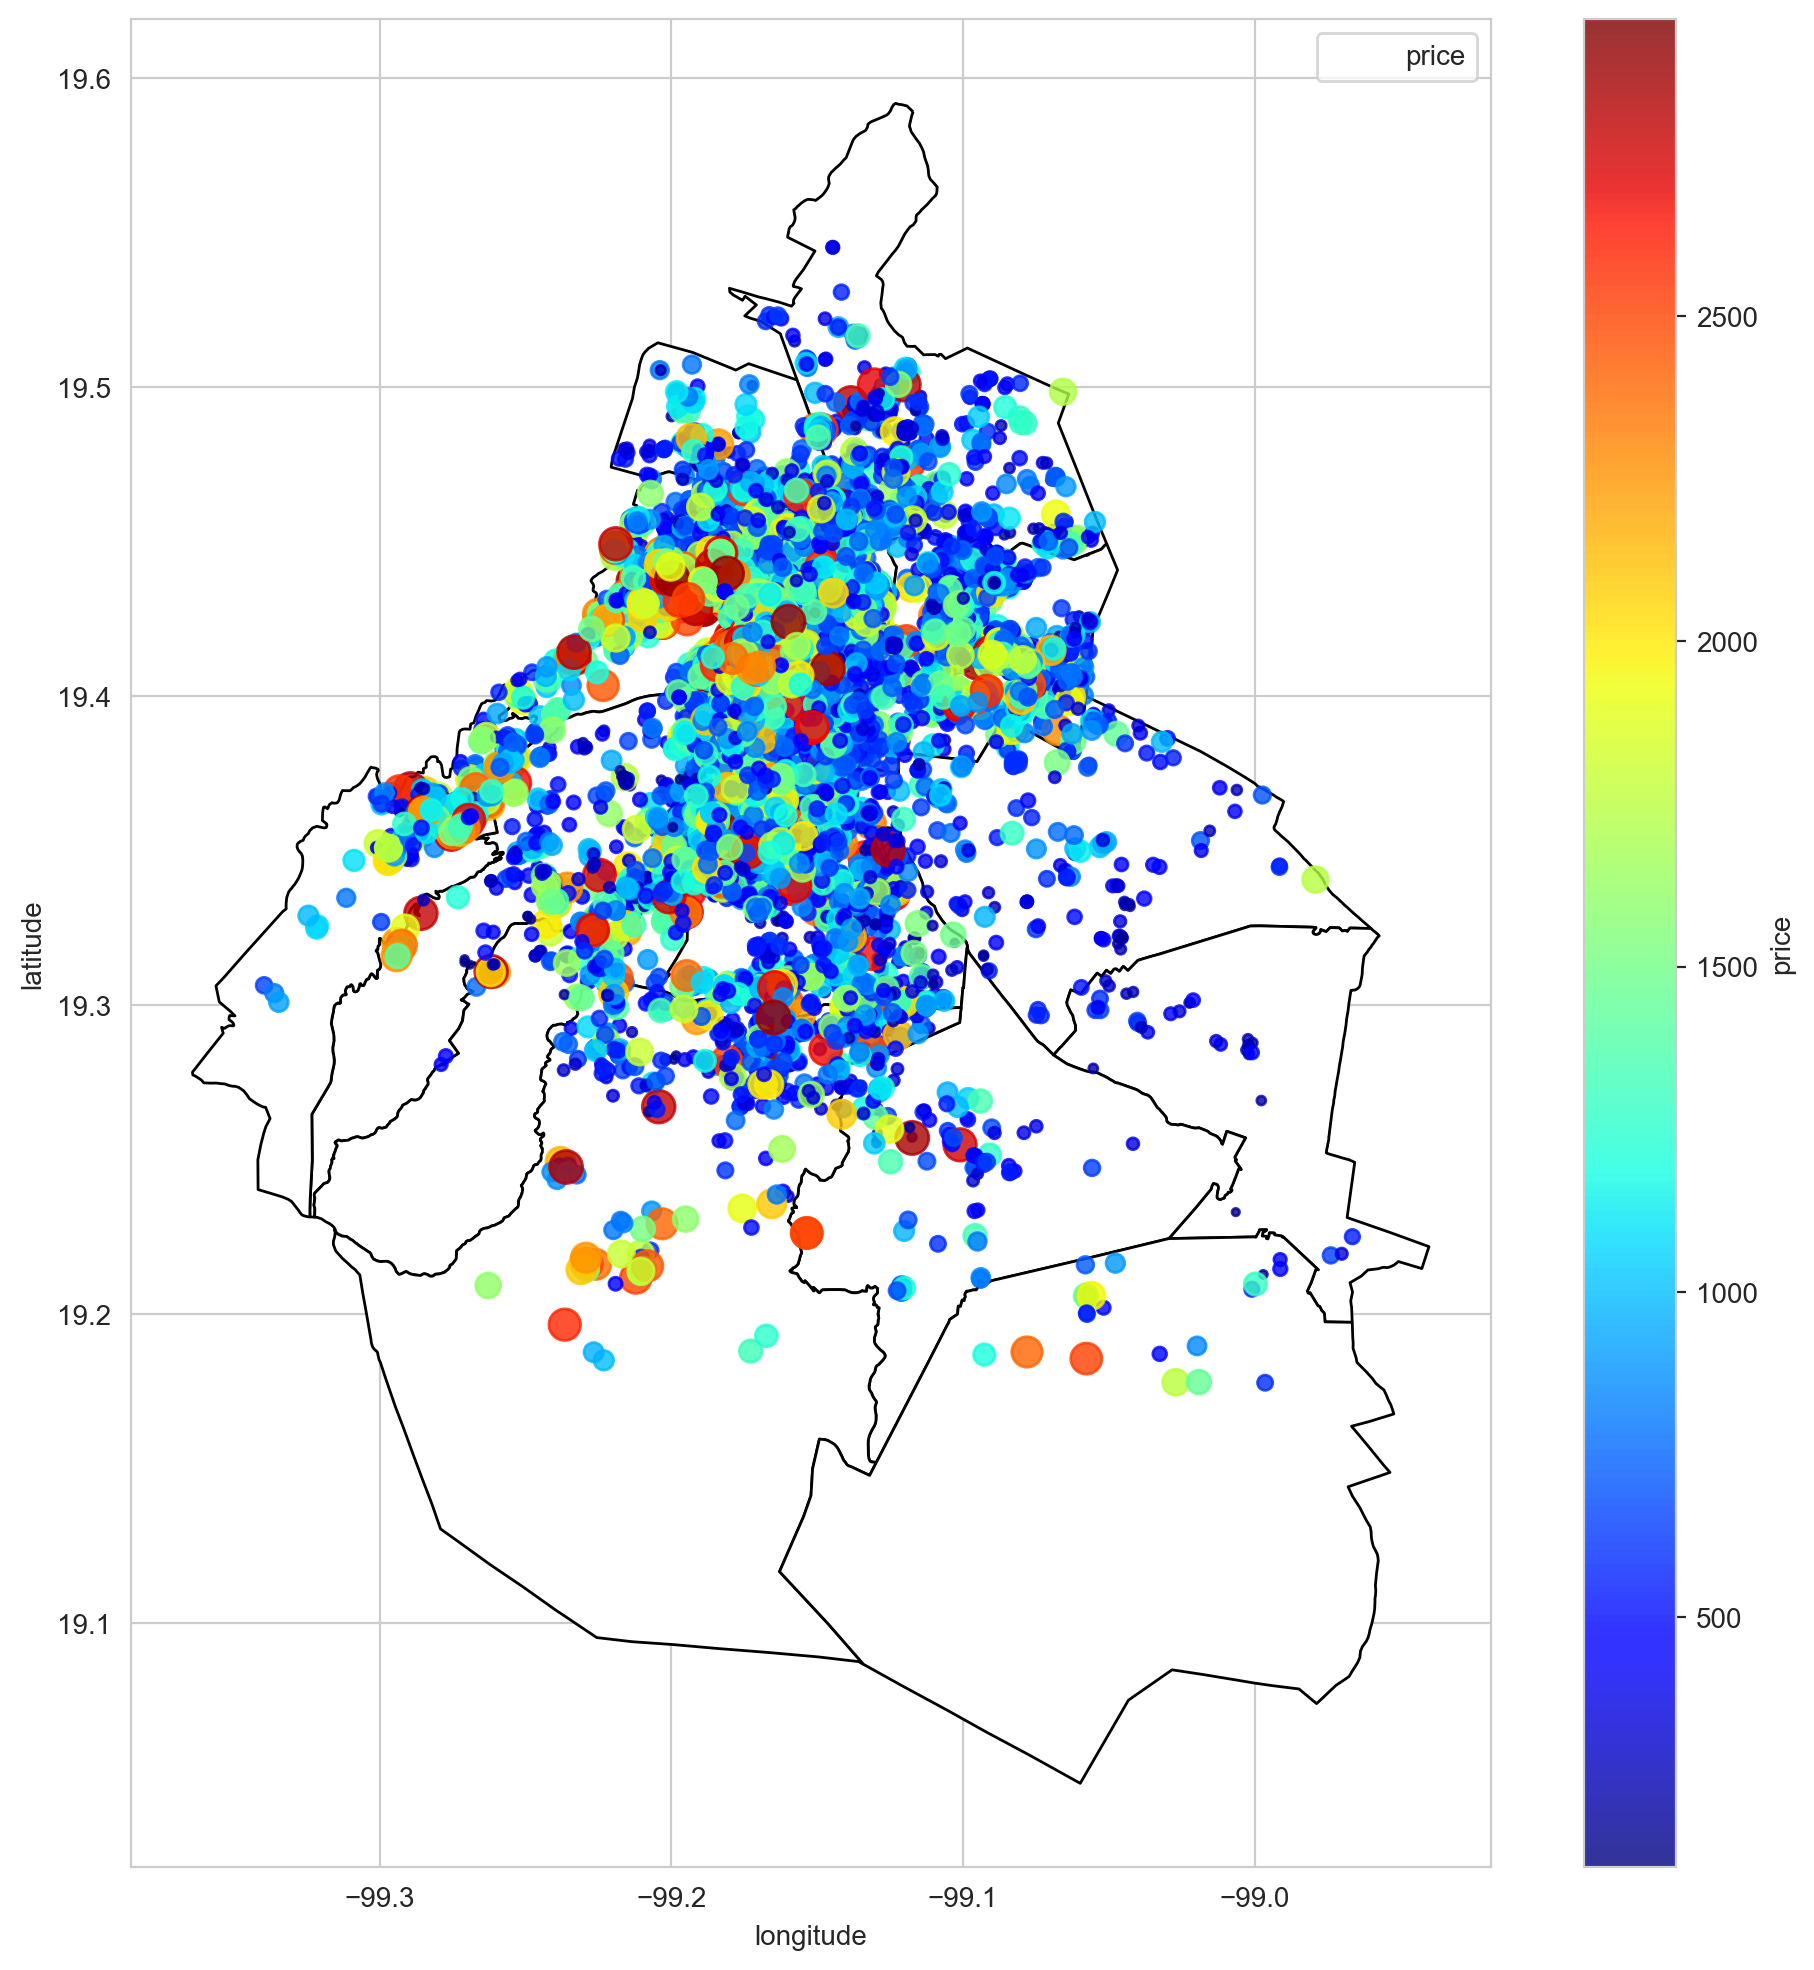

In [134]:
from math import ceil
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__name__, pd.__version__)
print(gpd.__name__, gpd.__version__)
print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

cdmx = gpd.read_file('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/mapa_mexico/')\
    .query('CVE_EDO=="09"')\
    .set_index('CLAVE')

base = cdmx.plot(color='white', edgecolor='black', scheme="naturalbreaks")

above = listings.plot(kind='scatter', 
            x='longitude', 
            y='latitude', 
            alpha=0.8, 
            ax=base,
            s=listings['price']*.05, 
            label="price", 
            figsize=(12, 12),
            c='price', 
            cmap=plt.get_cmap('jet'), 
            colorbar=True)


plt.show()

In [135]:
listings.shape

(23850, 91)

In [136]:
listings[ listings['price'].isna() ].shape

(3991, 91)

In [137]:
listings[ ~listings['price'].isna() ].shape

(19859, 91)

In [138]:
listings = listings[ ~listings['price'].isna() ]
listings.shape

(19859, 91)

## Variables discretas

In [139]:
listings[ var_disc ].describe(include='all')

host_name host_response_time host_is_superhost host_has_profile_pic  \
count       19854              18335             18870                19854   
unique       3424                  4                 2                    2   
top     Alejandra     within an hour                 f                    t   
freq          290              14994             11176                19440   
mean          NaN                NaN               NaN                  NaN   
std           NaN                NaN               NaN                  NaN   
min           NaN                NaN               NaN                  NaN   
25%           NaN                NaN               NaN                  NaN   
50%           NaN                NaN               NaN                  NaN   
75%           NaN                NaN               NaN                  NaN   
max           NaN                NaN               NaN                  NaN   

       host_identity_verified neighbourhood_cleansed       property_type  \
count                   19854                  19859               19859   
unique                      2                     16                  73   
top                         t             Cuauhtémoc  Entire rental unit   
freq                    19527                   9156                7496   
mean                      NaN                    NaN                 NaN   
std                       NaN                    NaN                 NaN   
min                       NaN                    NaN                 NaN   
25%                       NaN                    NaN                 NaN   
50%                       NaN                    NaN                 NaN   
75%                       NaN                    NaN                 NaN   
max                       NaN                    NaN                 NaN   

              room_type has_availability  host_verifications_email  \
count             19859            19674                 19,859.00   
unique                4                1                       NaN   
top     Entire home/apt                t                       NaN   
freq              12884            19674                       NaN   
mean                NaN              NaN                      0.91   
std                 NaN              NaN                      0.28   
min                 NaN              NaN                      0.00   
25%                 NaN              NaN                      1.00   
50%                 NaN              NaN                      1.00   
75%                 NaN              NaN                      1.00   
max                 NaN              NaN                      1.00   

        host_verifications_phone  host_verifications_workemail  \
count                  19,859.00                     19,859.00   
unique                       NaN                           NaN   
top                          NaN                           NaN   
freq                         NaN                           NaN   
mean                        1.00                          0.12   
std                         0.04                          0.33   
min                         0.00                          0.00   
25%                         1.00                          0.00   
50%                         1.00                          0.00   
75%                         1.00                          0.00   
max                         1.00                          1.00   

        host_in_location  
count          19,859.00  
unique               NaN  
top                  NaN  
freq                 NaN  
mean                0.77  
std                 0.42  
min                 0.00  
25%                 1.00  
50%                 1.00  
75%                 1.00  
max                 1.00

In [140]:
listings[ var_disc ].isna().sum() / listings.shape[0]*100

host_name                      0.03
host_response_time             7.67
host_is_superhost              4.98
host_has_profile_pic           0.03
host_identity_verified         0.03
neighbourhood_cleansed         0.00
property_type                  0.00
room_type                      0.00
has_availability               0.93
host_verifications_email       0.00
host_verifications_phone       0.00
host_verifications_workemail   0.00
host_in_location               0.00
dtype: float64

In [141]:
listings['host_name'] = listings['host_name'].fillna('sin_registro')
listings['host_response_time'] = listings['host_response_time'].fillna('sin_registro')
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('sin_registro')
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna('sin_registro')
listings['host_identity_verified'] = listings['host_identity_verified'].fillna('sin_registro')
listings['has_availability'] = listings['has_availability'].fillna('sin_registro')

In [142]:
listings[ var_disc ].isna().sum() / listings.shape[0]*100

host_name                      0.00
host_response_time             0.00
host_is_superhost              0.00
host_has_profile_pic           0.00
host_identity_verified         0.00
neighbourhood_cleansed         0.00
property_type                  0.00
room_type                      0.00
has_availability               0.00
host_verifications_email       0.00
host_verifications_phone       0.00
host_verifications_workemail   0.00
host_in_location               0.00
dtype: float64

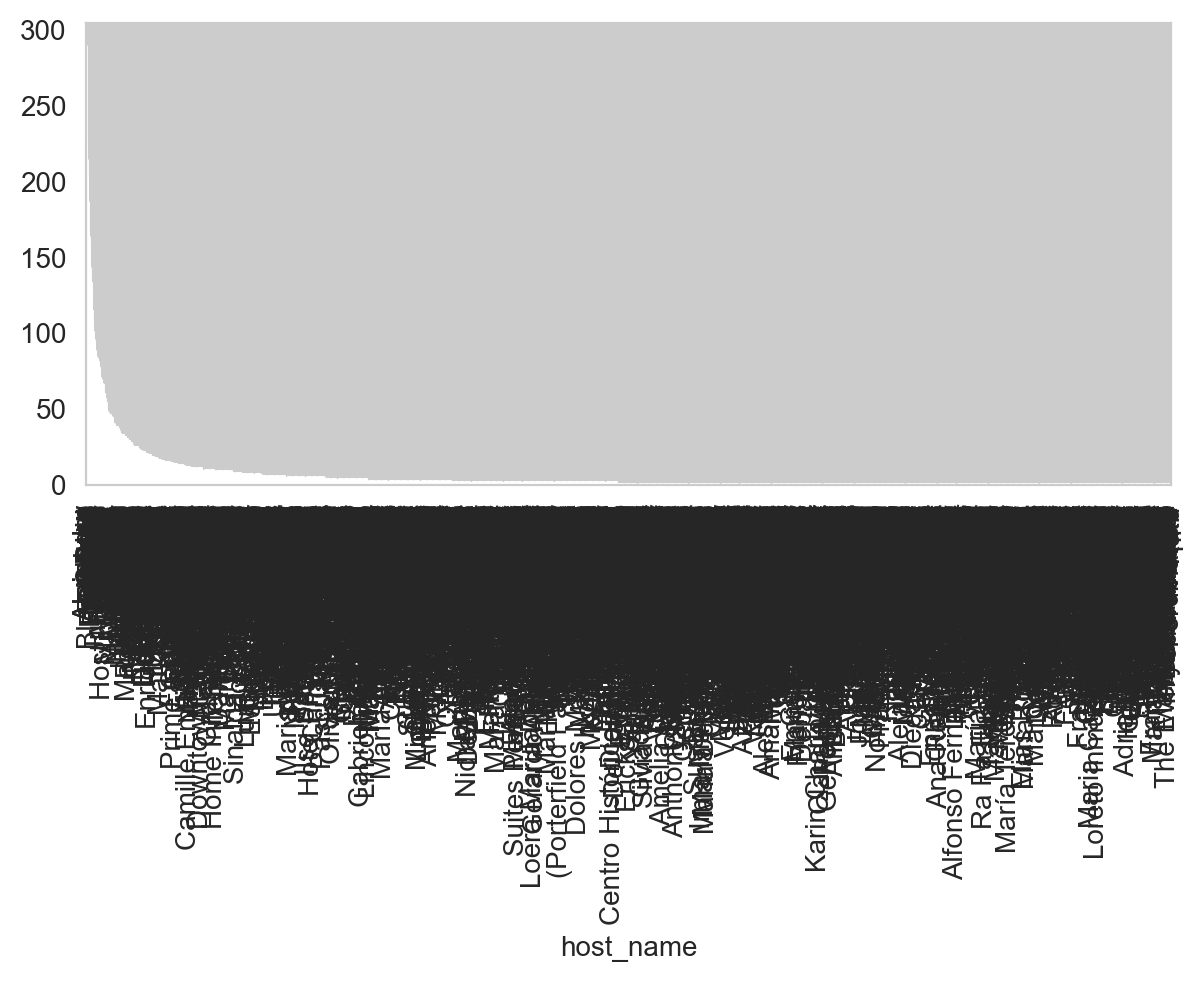

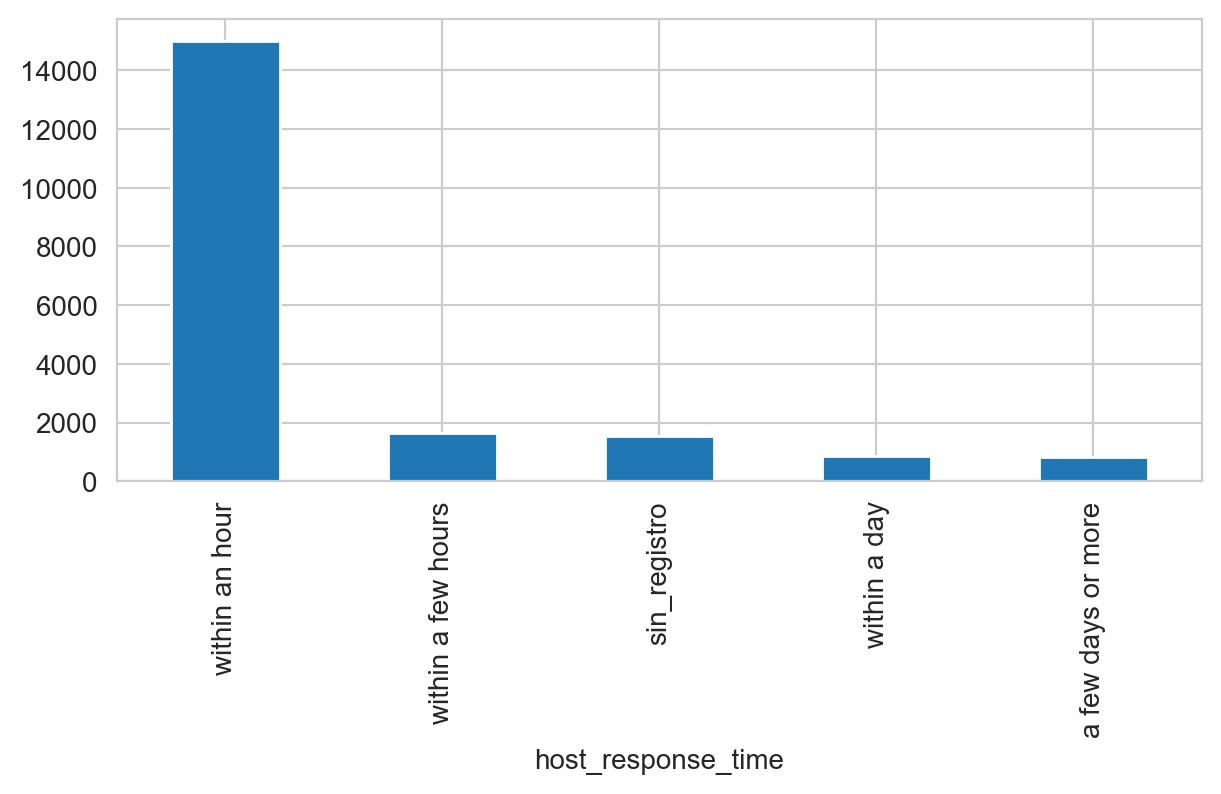

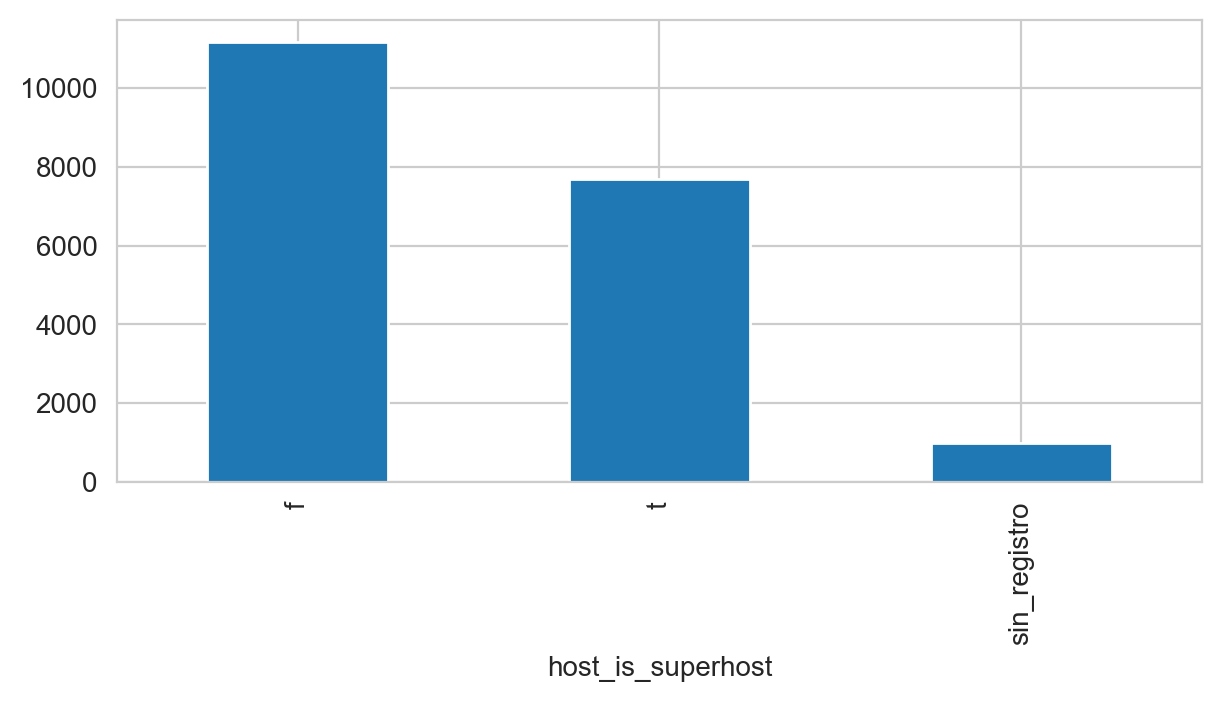

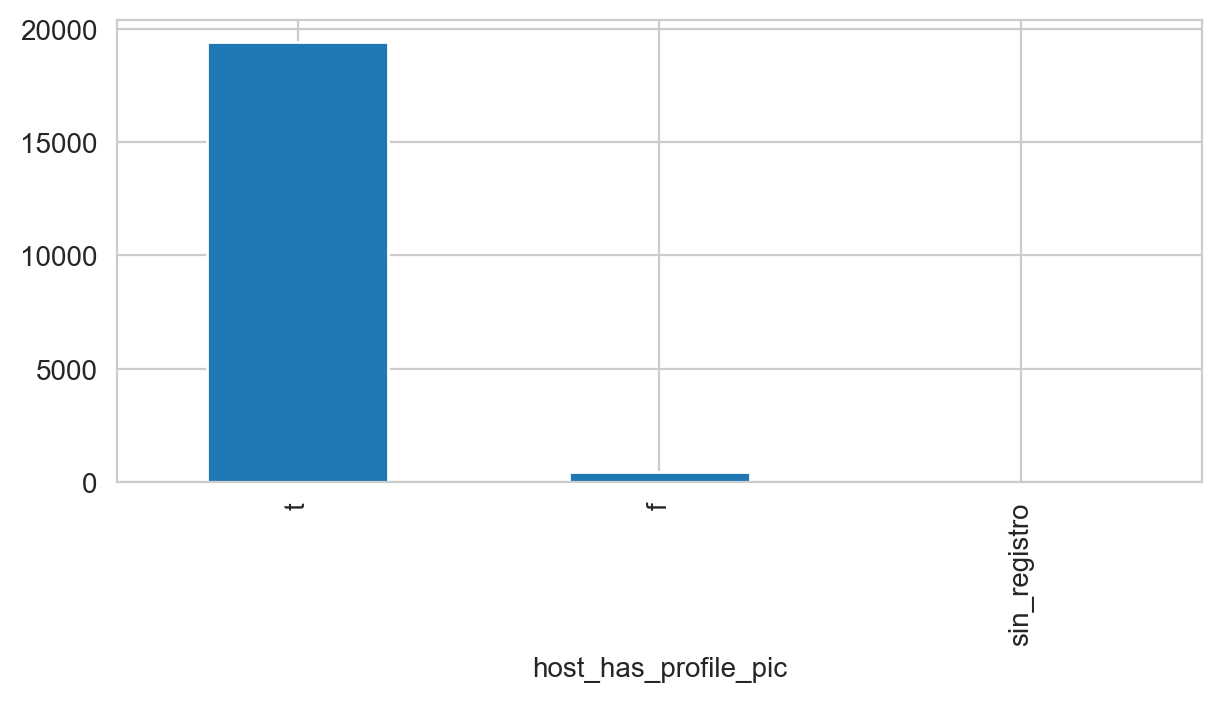

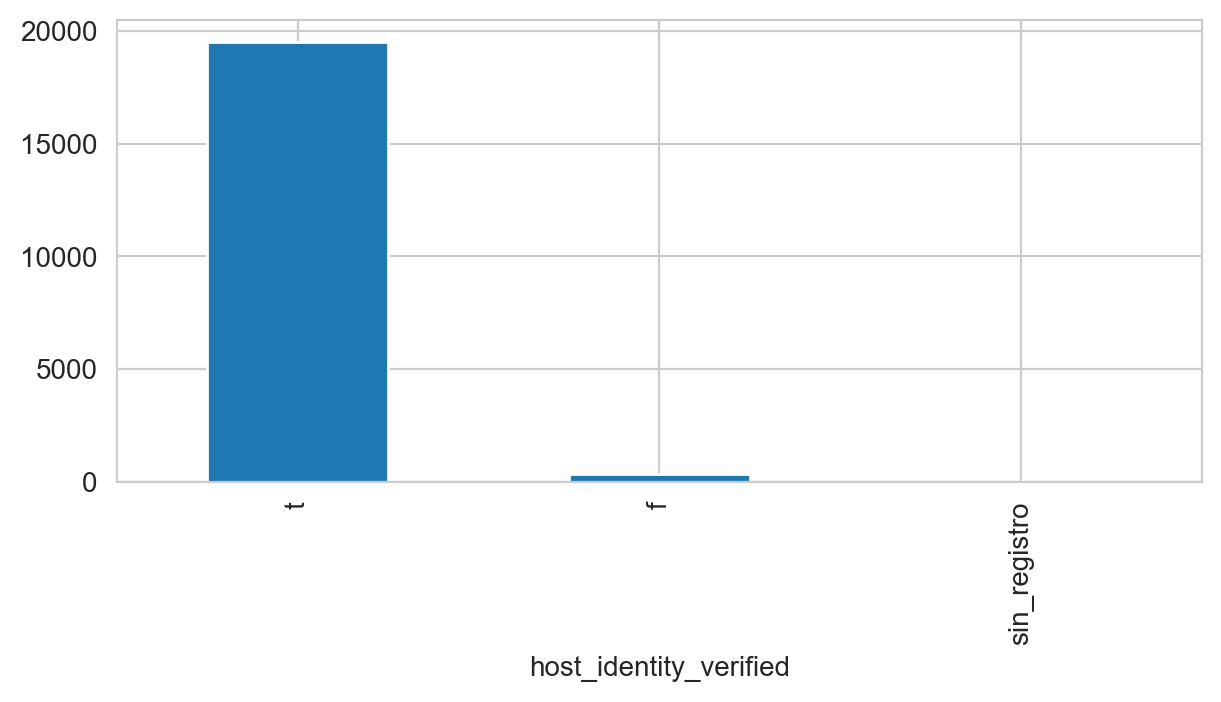

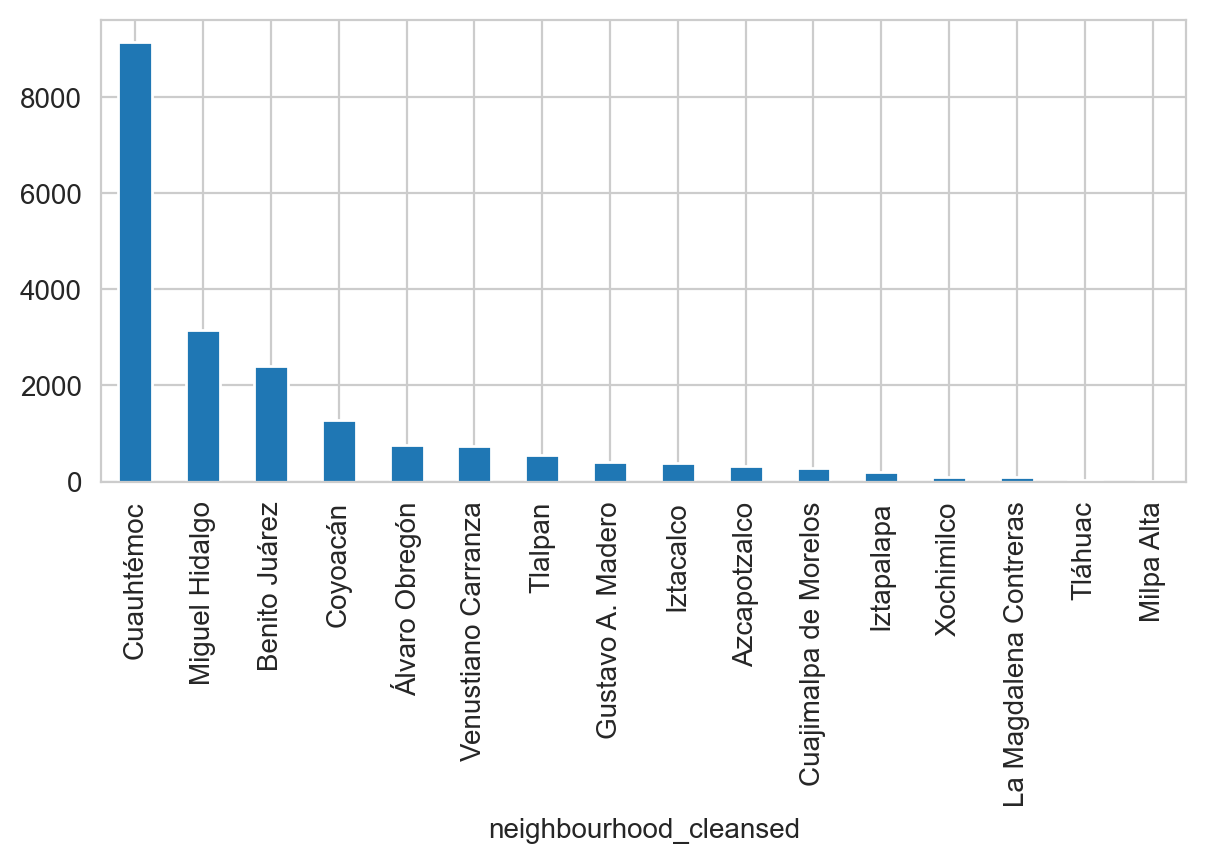

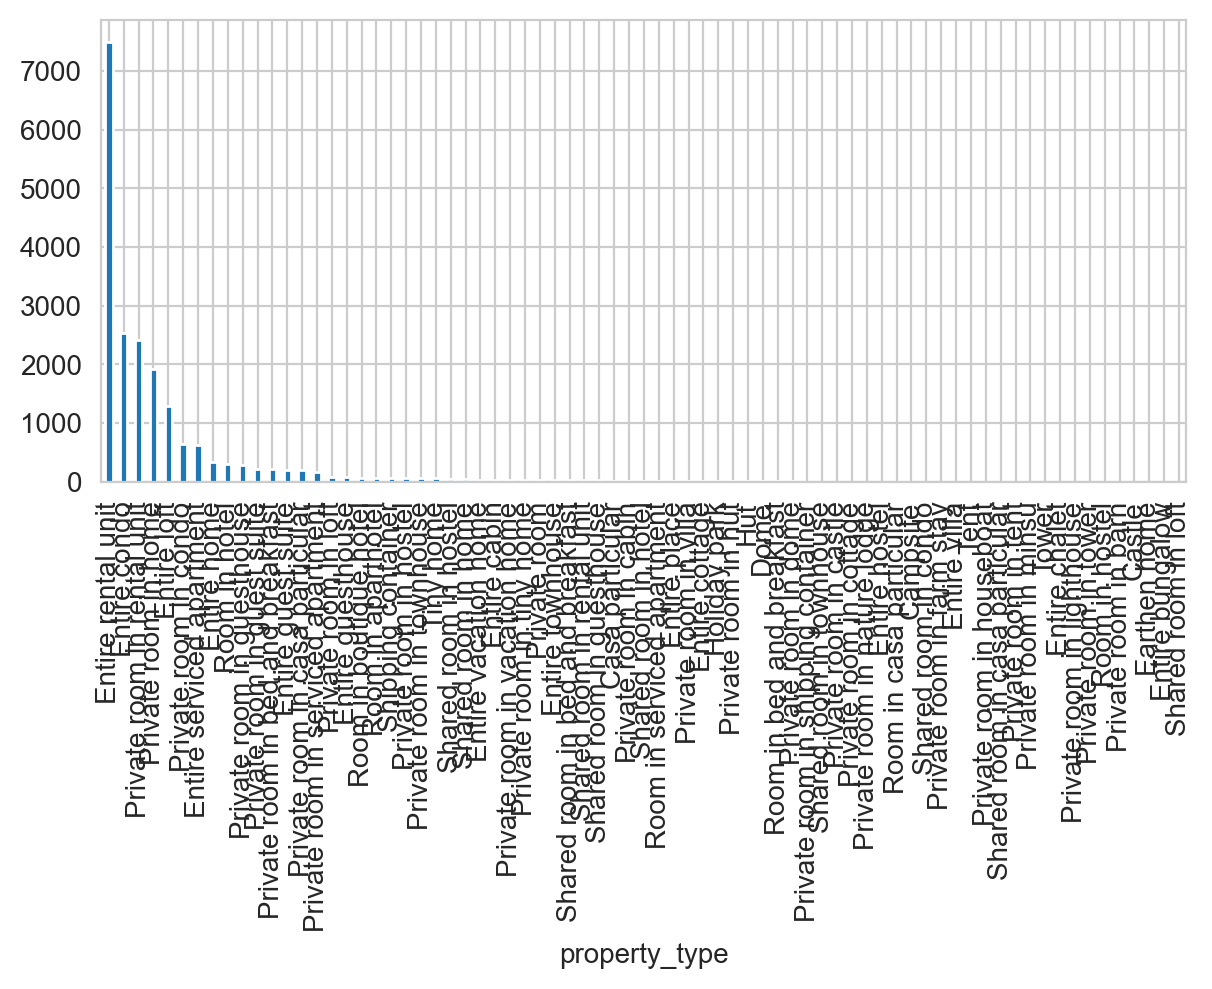

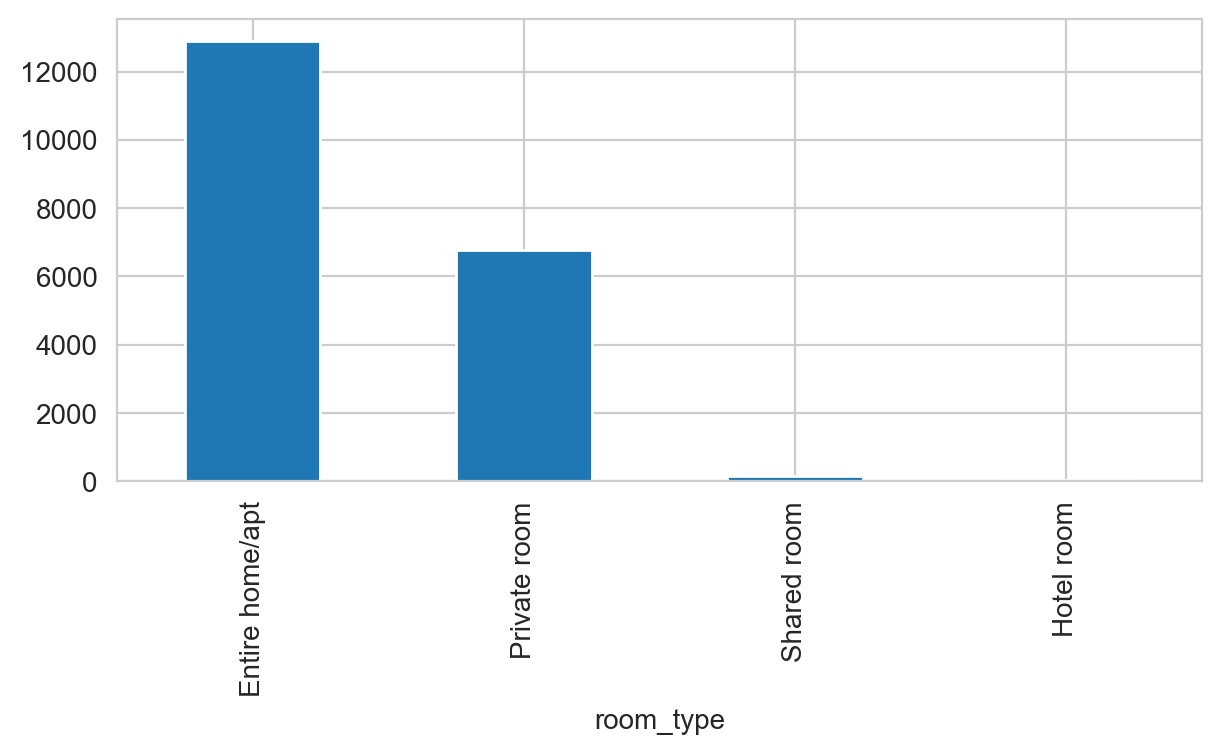

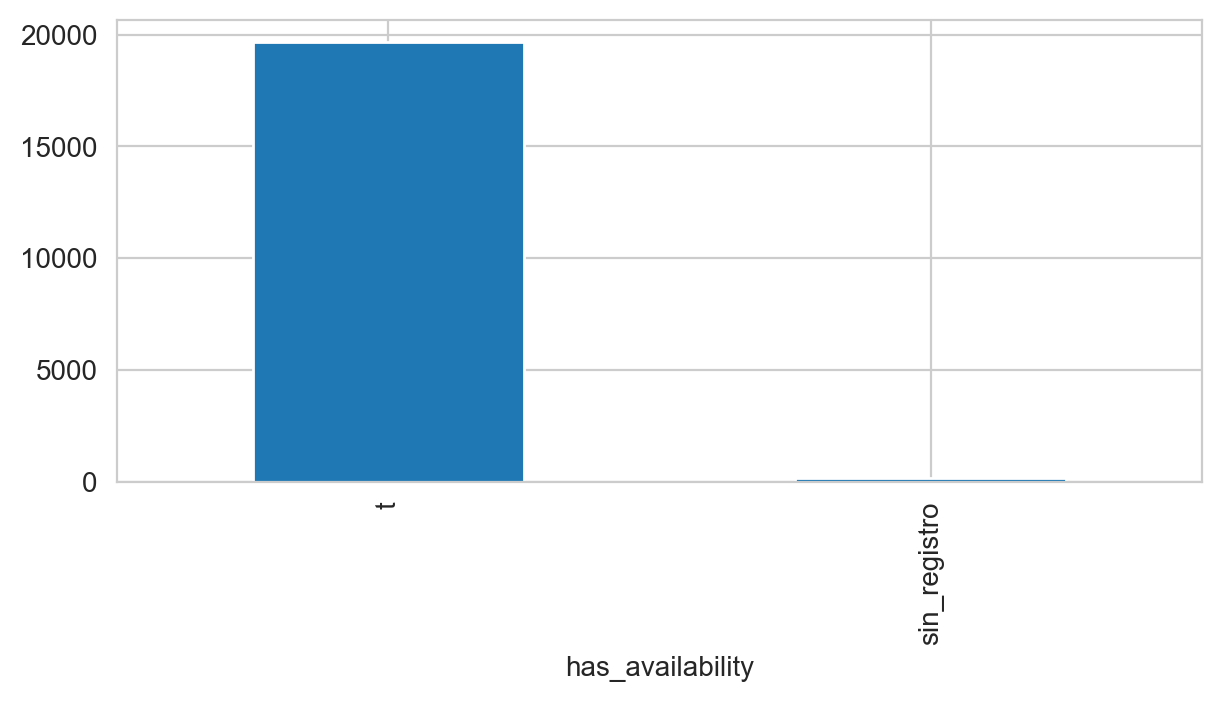

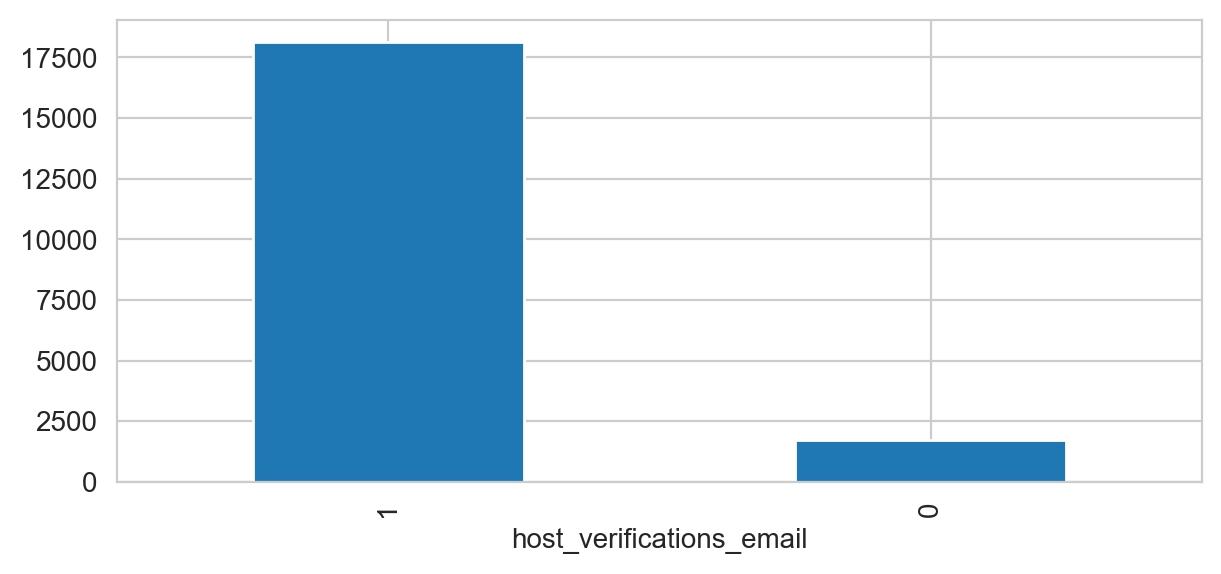

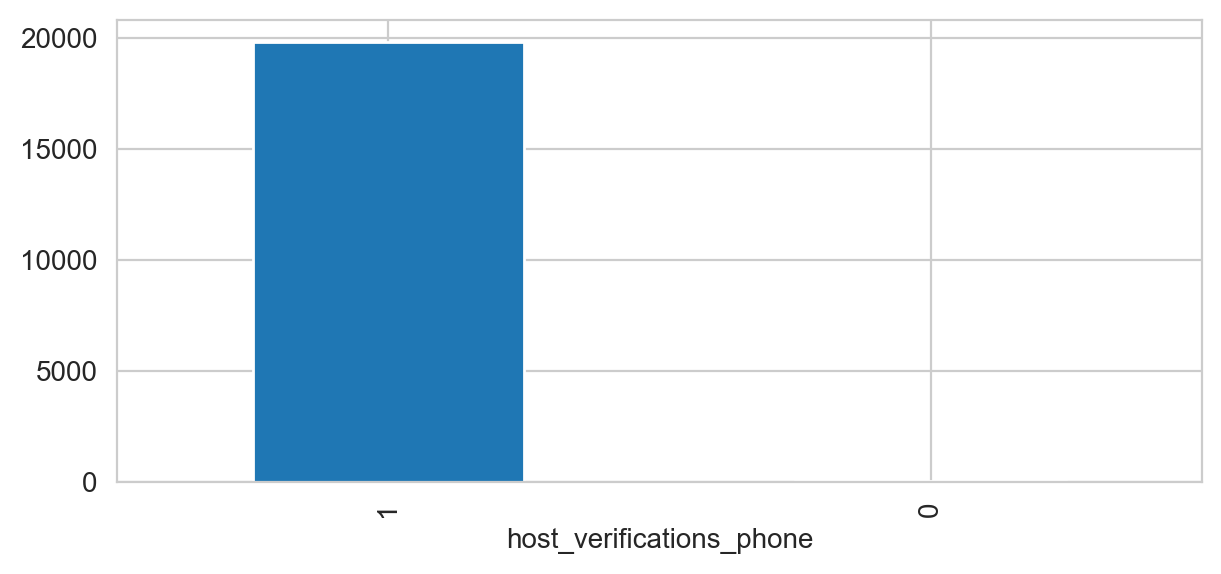

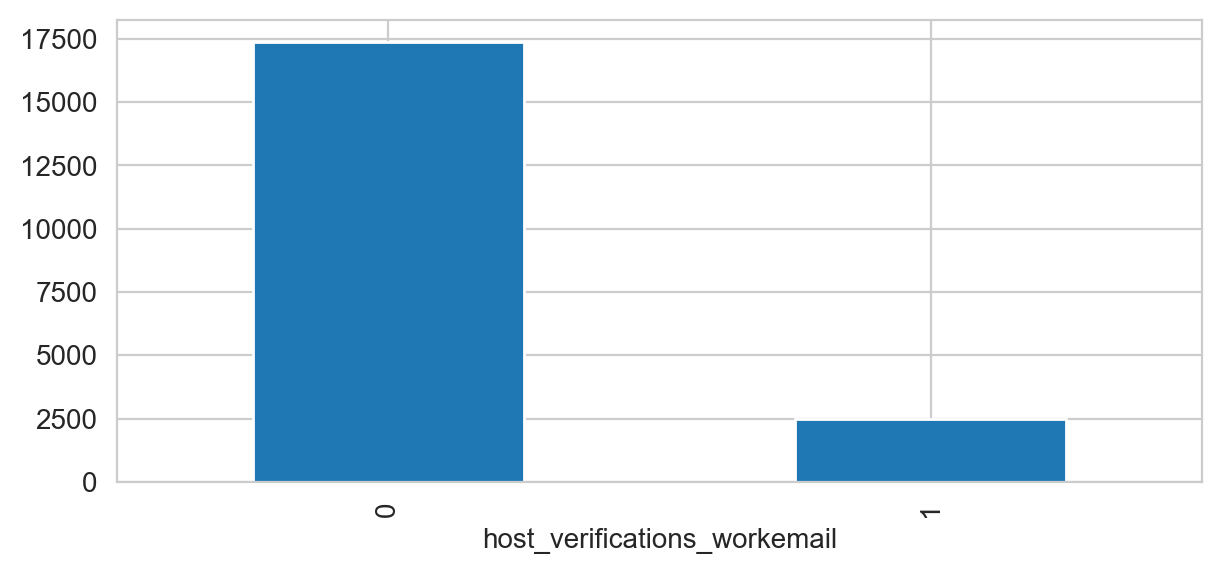

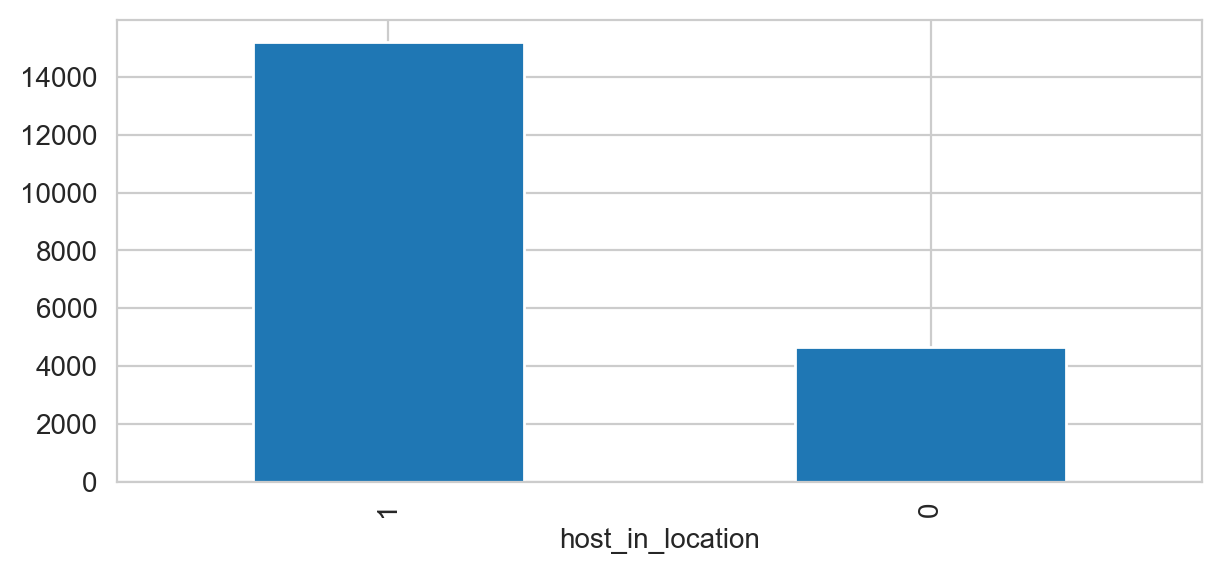

In [143]:
for x in var_disc:
    plt.figure(figsize=(7, 3))
    listings[x].value_counts().plot(kind='bar')
    plt.show()

In [144]:
def freq(df, var):
    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

freq(listings, var=var_disc)

La variable: host_name


FA   FR    FAA  FRA
host_name                         
Alejandra     290 0.01    290 0.01
Alejandro     226 0.01    516 0.03
Juan          215 0.01    731 0.04
Luis          204 0.01    935 0.05
Raul          204 0.01   1139 0.06
...           ...  ...    ...  ...
Arielle         1 0.00  19855 1.00
Ferdinando      1 0.00  19856 1.00
Juan Alberto    1 0.00  19857 1.00
Joaquín         1 0.00  19858 1.00
Kath            1 0.00  19859 1.00

[3425 rows x 4 columns]



La variable: host_response_time


FA   FR    FAA  FRA
host_response_time                        
within an hour      14994 0.76  14994 0.76
within a few hours   1657 0.08  16651 0.84
sin_registro         1524 0.08  18175 0.92
within a day          844 0.04  19019 0.96
a few days or more    840 0.04  19859 1.00



La variable: host_is_superhost


FA   FR    FAA  FRA
host_is_superhost                        
f                  11176 0.56  11176 0.56
t                   7694 0.39  18870 0.95
sin_registro         989 0.05  19859 1.00



La variable: host_has_profile_pic


FA   FR    FAA  FRA
host_has_profile_pic                        
t                     19440 0.98  19440 0.98
f                       414 0.02  19854 1.00
sin_registro              5 0.00  19859 1.00



La variable: host_identity_verified


FA   FR    FAA  FRA
host_identity_verified                        
t                       19527 0.98  19527 0.98
f                         327 0.02  19854 1.00
sin_registro                5 0.00  19859 1.00



La variable: neighbourhood_cleansed


FA   FR    FAA  FRA
neighbourhood_cleansed                       
Cuauhtémoc              9156 0.46   9156 0.46
Miguel Hidalgo          3147 0.16  12303 0.62
Benito Juárez           2396 0.12  14699 0.74
Coyoacán                1288 0.06  15987 0.81
Álvaro Obregón           762 0.04  16749 0.84
Venustiano Carranza      737 0.04  17486 0.88
Tlalpan                  553 0.03  18039 0.91
Gustavo A. Madero        414 0.02  18453 0.93
Iztacalco                383 0.02  18836 0.95
Azcapotzalco             314 0.02  19150 0.96
Cuajimalpa de Morelos    276 0.01  19426 0.98
Iztapalapa               202 0.01  19628 0.99
Xochimilco                93 0.00  19721 0.99
La Magdalena Contreras    86 0.00  19807 1.00
Tláhuac                   31 0.00  19838 1.00
Milpa Alta                21 0.00  19859 1.00



La variable: property_type


FA   FR    FAA  FRA
property_type                                     
Entire rental unit           7496 0.38   7496 0.38
Entire condo                 2541 0.13  10037 0.51
Private room in rental unit  2408 0.12  12445 0.63
Private room in home         1921 0.10  14366 0.72
Entire loft                  1282 0.06  15648 0.79
...                           ...  ...    ...  ...
Private room in barn            1 0.00  19855 1.00
Castle                          1 0.00  19856 1.00
Earthen home                    1 0.00  19857 1.00
Entire bungalow                 1 0.00  19858 1.00
Shared room in loft             1 0.00  19859 1.00

[73 rows x 4 columns]



La variable: room_type


FA   FR    FAA  FRA
room_type                              
Entire home/apt  12884 0.65  12884 0.65
Private room      6771 0.34  19655 0.99
Shared room        168 0.01  19823 1.00
Hotel room          36 0.00  19859 1.00



La variable: has_availability


FA   FR    FAA  FRA
has_availability                        
t                 19674 0.99  19674 0.99
sin_registro        185 0.01  19859 1.00



La variable: host_verifications_email


FA   FR    FAA  FRA
host_verifications_email                        
1                         18146 0.91  18146 0.91
0                          1713 0.09  19859 1.00



La variable: host_verifications_phone


FA   FR    FAA  FRA
host_verifications_phone                        
1                         19821 1.00  19821 1.00
0                            38 0.00  19859 1.00



La variable: host_verifications_workemail


FA   FR    FAA  FRA
host_verifications_workemail                        
0                             17384 0.88  17384 0.88
1                              2475 0.12  19859 1.00



La variable: host_in_location


FA   FR    FAA  FRA
host_in_location                        
1                 15210 0.77  15210 0.77
0                  4649 0.23  19859 1.00

In [145]:
def normalizar(df, v, umbral):
    #umbral = 0.03 # 0.05
    aux = df[v].value_counts(True).to_frame()
    aux[f"n__{v}"] = np.where( aux['proportion'] < umbral , 'CAT_PEQUE' ,aux.index )
    
    moda  = aux.head()[f'n__{v}'].values[0]
    
    if aux.loc[ aux[f'n__{v}'] == 'CAT_PEQUE' ]['proportion'].sum() < umbral:
        aux[f'n__{v}'].replace({'CAT_PEQUE':moda},inplace=True)
    
    aux.reset_index(inplace=True)

    return df.merge( aux , left_on=[v] , right_on=[v] , how='left' ).drop('proportion',axis=1)

umbral = 0.05
for v in var_disc:
    print(f"Normalizando: {v}")
    listings =  normalizar( listings , v, umbral)

Normalizando: host_name
Normalizando: host_response_time
Normalizando: host_is_superhost
Normalizando: host_has_profile_pic
Normalizando: host_identity_verified
Normalizando: neighbourhood_cleansed
Normalizando: property_type
Normalizando: room_type
Normalizando: has_availability
Normalizando: host_verifications_email
Normalizando: host_verifications_phone
Normalizando: host_verifications_workemail
Normalizando: host_in_location


In [146]:
listings.shape

(19859, 104)

In [147]:
var_disc = listings.filter( like='n__' ).columns.tolist()
var_disc

['n__host_name',
 'n__host_response_time',
 'n__host_is_superhost',
 'n__host_has_profile_pic',
 'n__host_identity_verified',
 'n__neighbourhood_cleansed',
 'n__property_type',
 'n__room_type',
 'n__has_availability',
 'n__host_verifications_email',
 'n__host_verifications_phone',
 'n__host_verifications_workemail',
 'n__host_in_location']

In [148]:
freq( listings, var_disc)

La variable: n__host_name


FA   FR    FAA  FRA
n__host_name                        
CAT_PEQUE     19859 1.00  19859 1.00



La variable: n__host_response_time


FA   FR    FAA  FRA
n__host_response_time                        
within an hour         14994 0.76  14994 0.76
CAT_PEQUE               1684 0.08  16678 0.84
within a few hours      1657 0.08  18335 0.92
sin_registro            1524 0.08  19859 1.00



La variable: n__host_is_superhost


FA   FR    FAA  FRA
n__host_is_superhost                        
f                     12165 0.61  12165 0.61
t                      7694 0.39  19859 1.00



La variable: n__host_has_profile_pic


FA   FR    FAA  FRA
n__host_has_profile_pic                        
t                        19859 1.00  19859 1.00



La variable: n__host_identity_verified


FA   FR    FAA  FRA
n__host_identity_verified                        
t                          19859 1.00  19859 1.00



La variable: n__neighbourhood_cleansed


FA   FR    FAA  FRA
n__neighbourhood_cleansed                       
Cuauhtémoc                 9156 0.46   9156 0.46
CAT_PEQUE                  3872 0.19  13028 0.66
Miguel Hidalgo             3147 0.16  16175 0.81
Benito Juárez              2396 0.12  18571 0.94
Coyoacán                   1288 0.06  19859 1.00



La variable: n__property_type


FA   FR    FAA  FRA
n__property_type                                  
Entire rental unit           7496 0.38   7496 0.38
CAT_PEQUE                    4211 0.21  11707 0.59
Entire condo                 2541 0.13  14248 0.72
Private room in rental unit  2408 0.12  16656 0.84
Private room in home         1921 0.10  18577 0.94
Entire loft                  1282 0.06  19859 1.00



La variable: n__room_type


FA   FR    FAA  FRA
n__room_type                           
Entire home/apt  13088 0.66  13088 0.66
Private room      6771 0.34  19859 1.00



La variable: n__has_availability


FA   FR    FAA  FRA
n__has_availability                        
t                    19859 1.00  19859 1.00



La variable: n__host_verifications_email


FA   FR    FAA  FRA
n__host_verifications_email                        
1                            18146 0.91  18146 0.91
0                             1713 0.09  19859 1.00



La variable: n__host_verifications_phone


FA   FR    FAA  FRA
n__host_verifications_phone                        
1                            19859 1.00  19859 1.00



La variable: n__host_verifications_workemail


FA   FR    FAA  FRA
n__host_verifications_workemail                        
0                                17384 0.88  17384 0.88
1                                 2475 0.12  19859 1.00



La variable: n__host_in_location


FA   FR    FAA  FRA
n__host_in_location                        
1                    15210 0.77  15210 0.77
0                     4649 0.23  19859 1.00

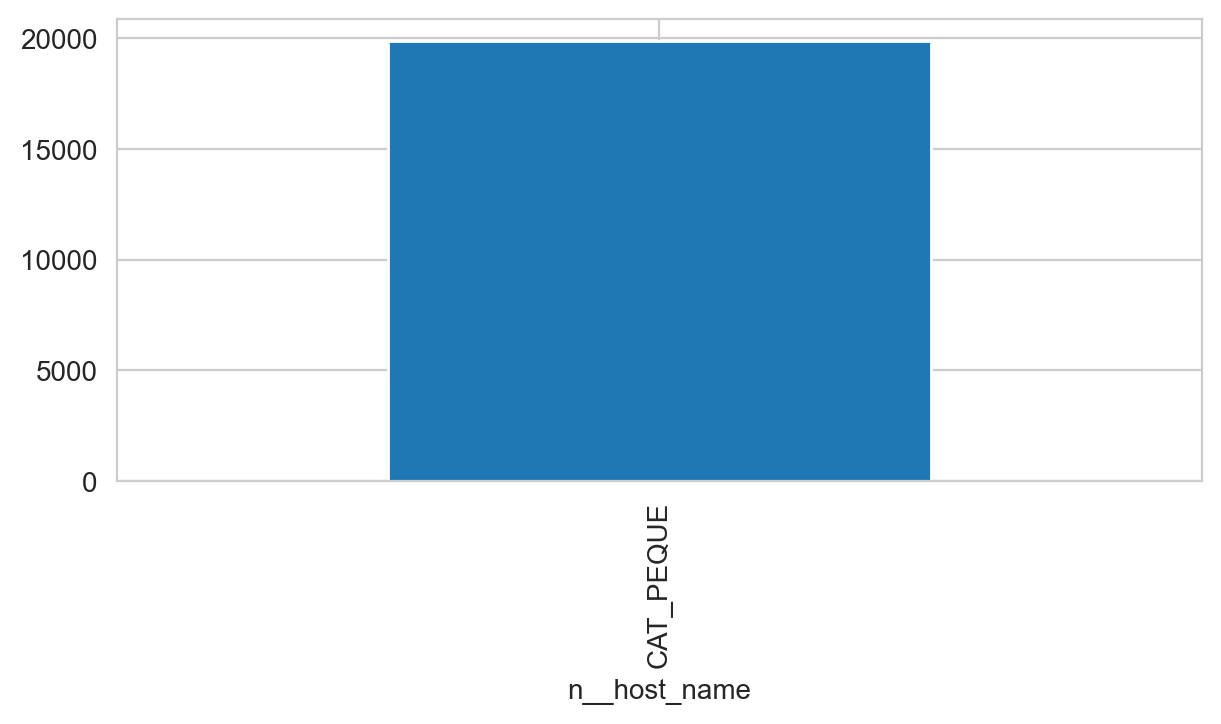

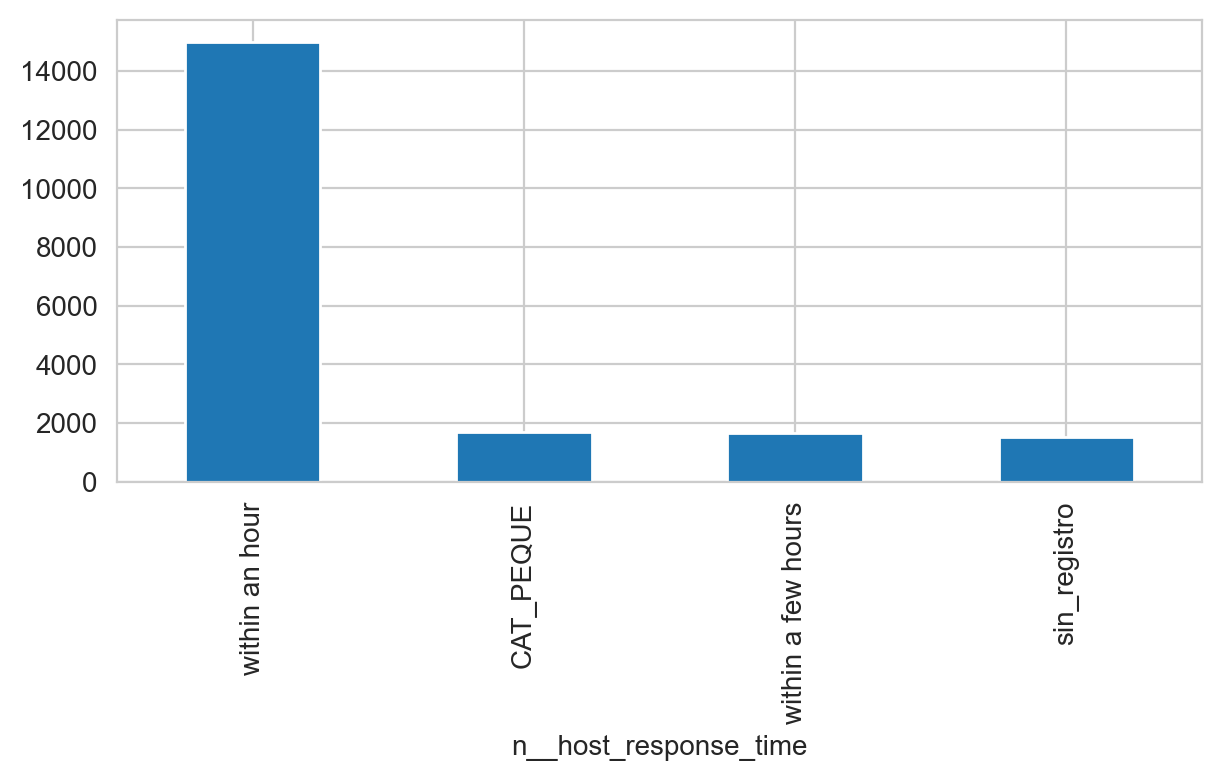

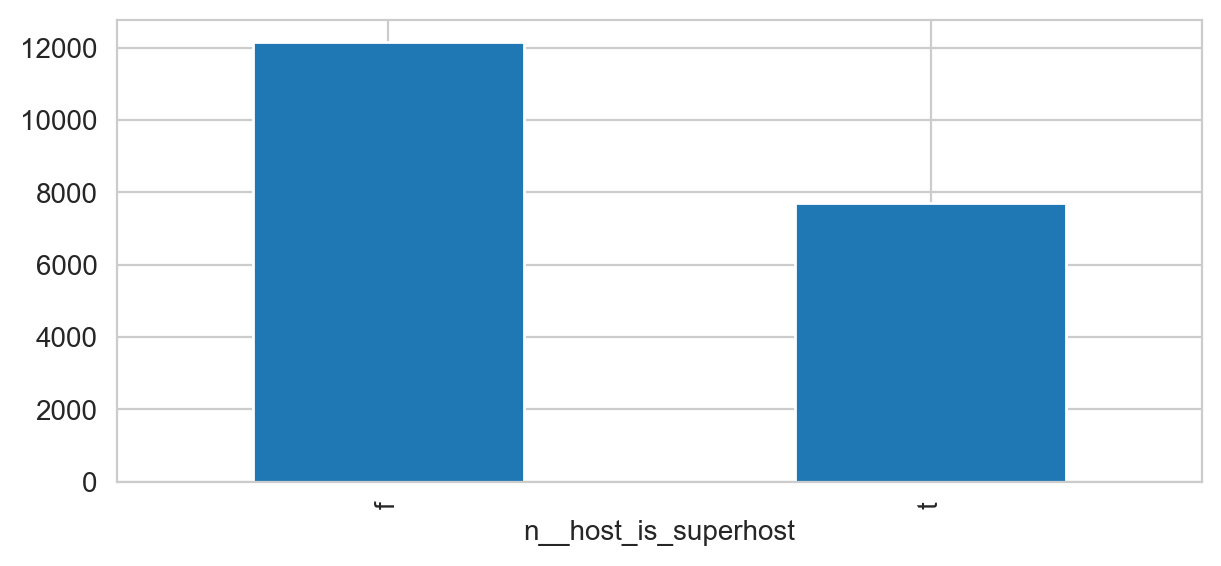

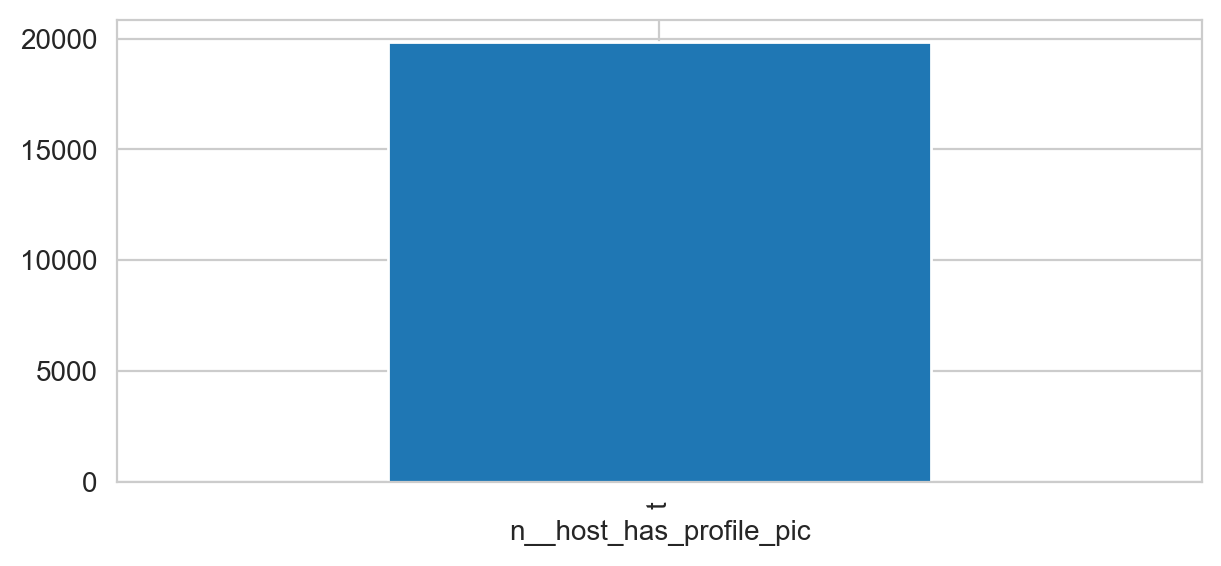

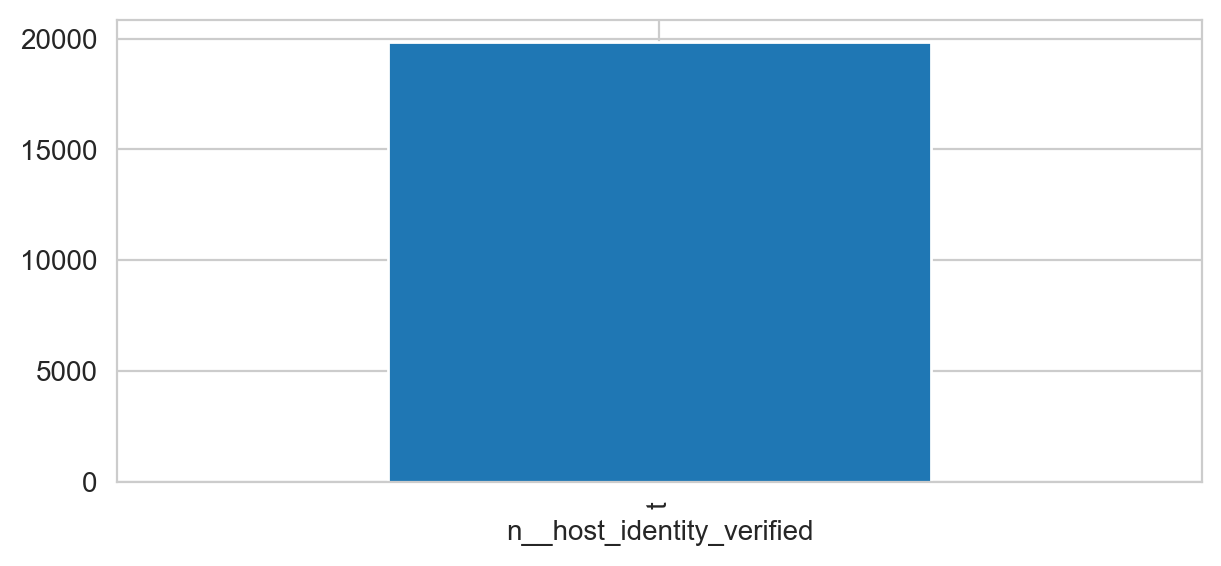

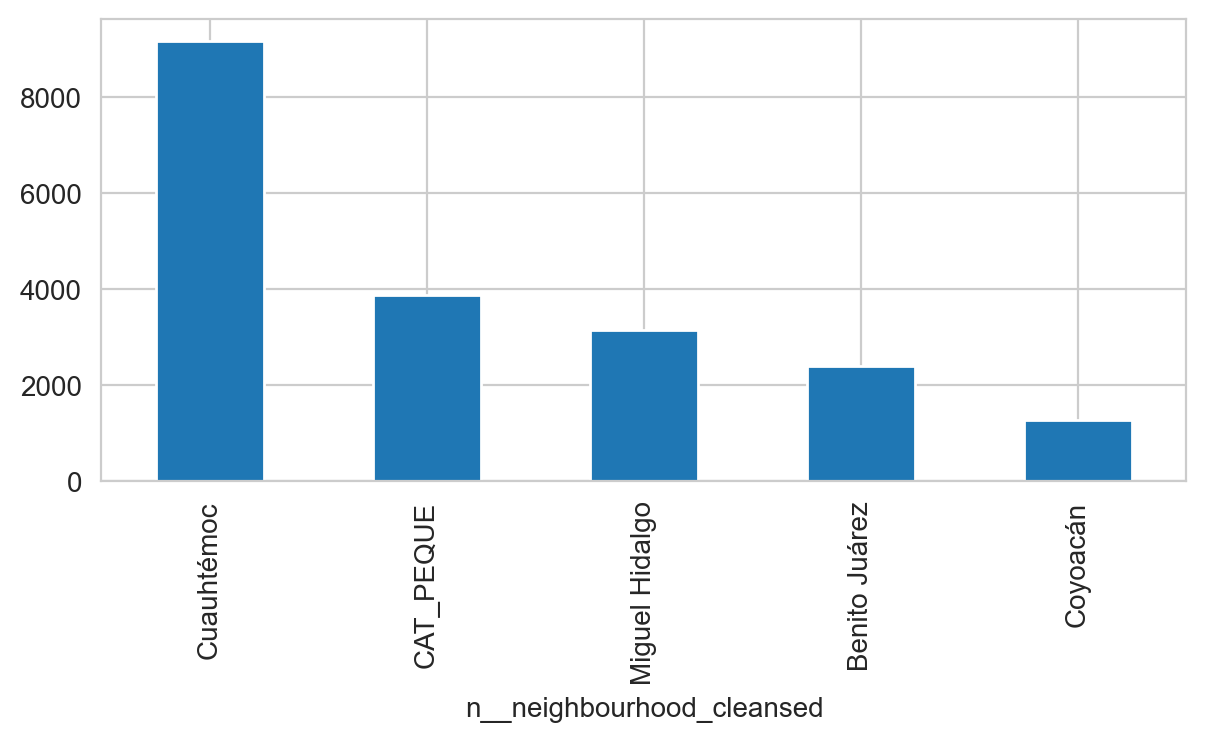

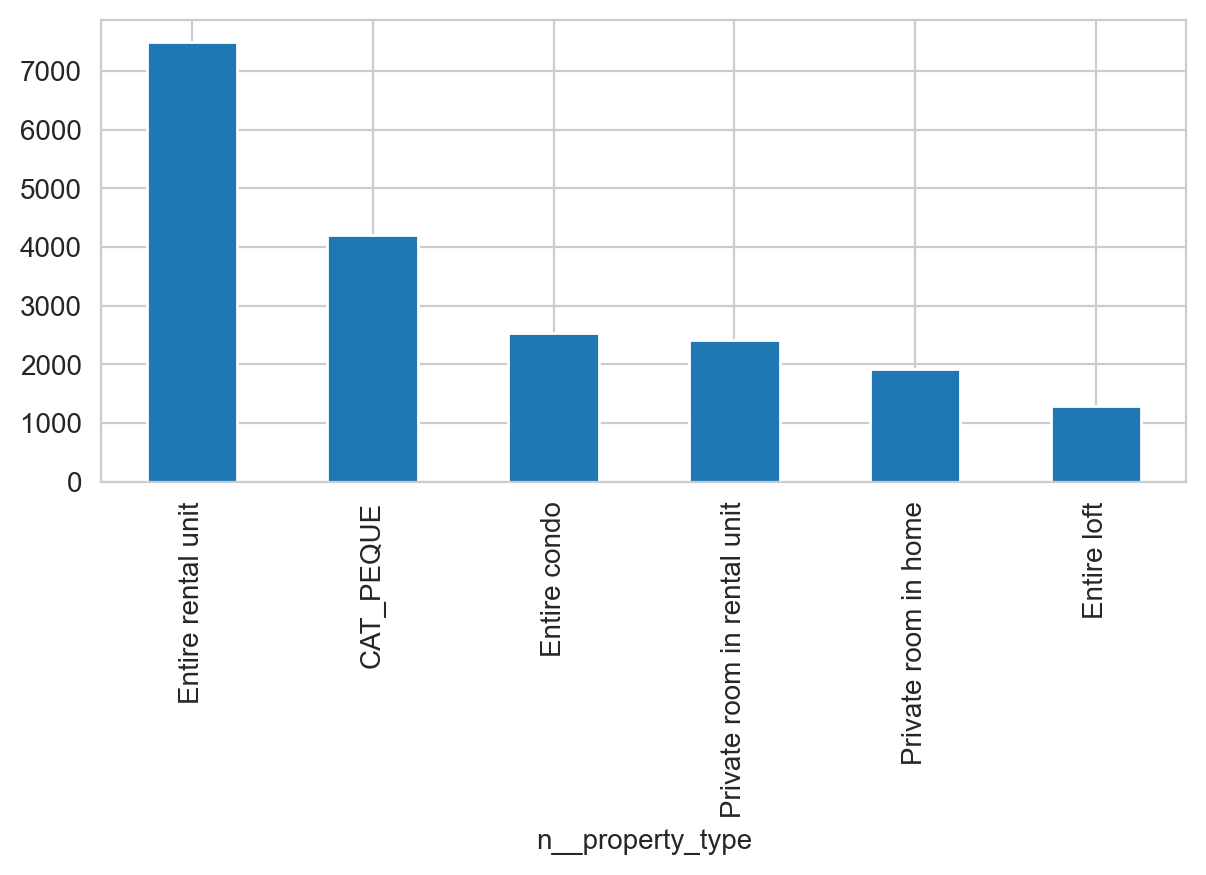

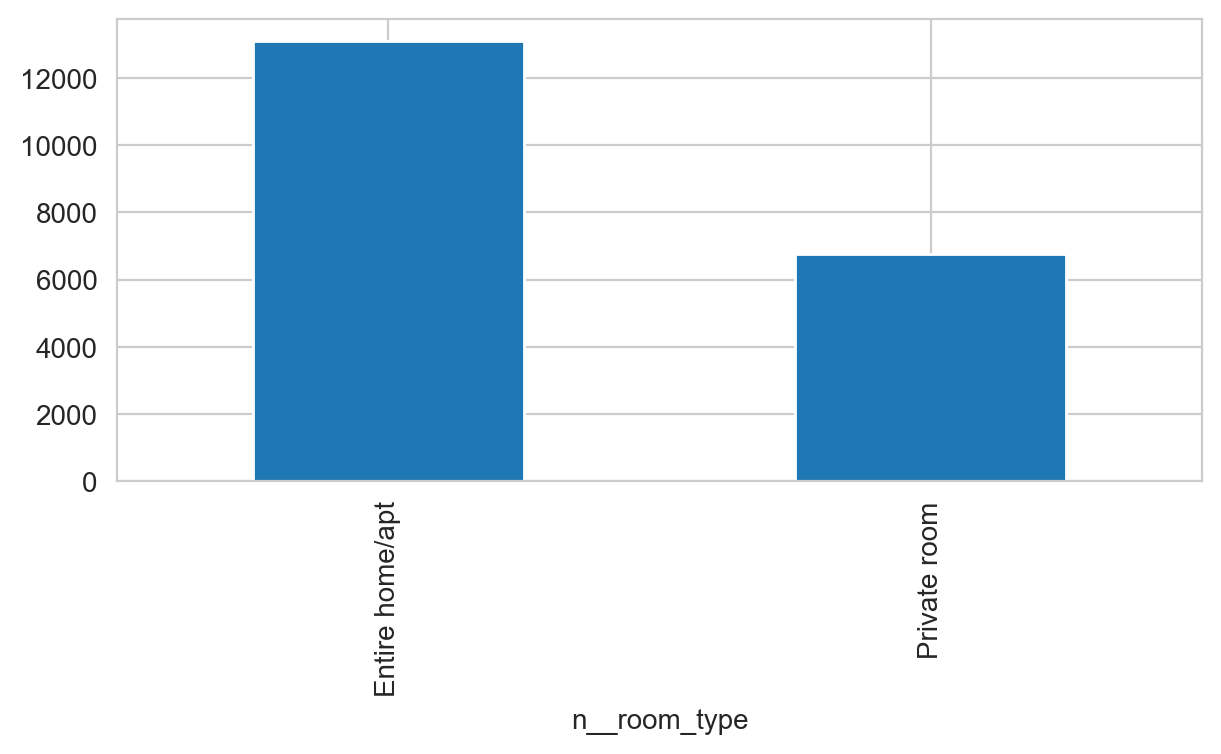

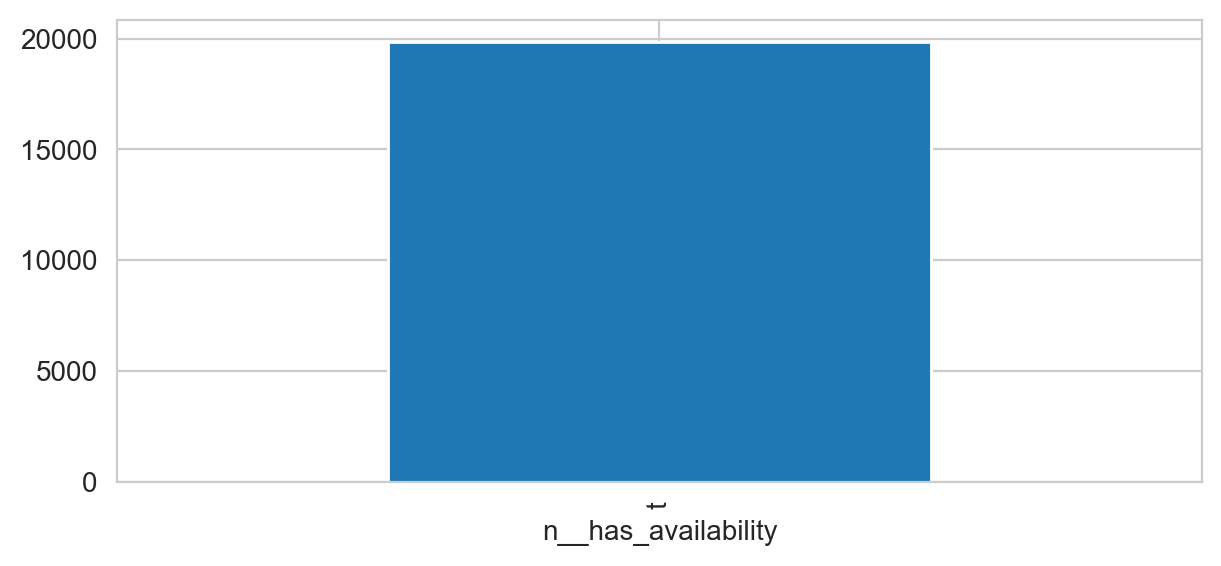

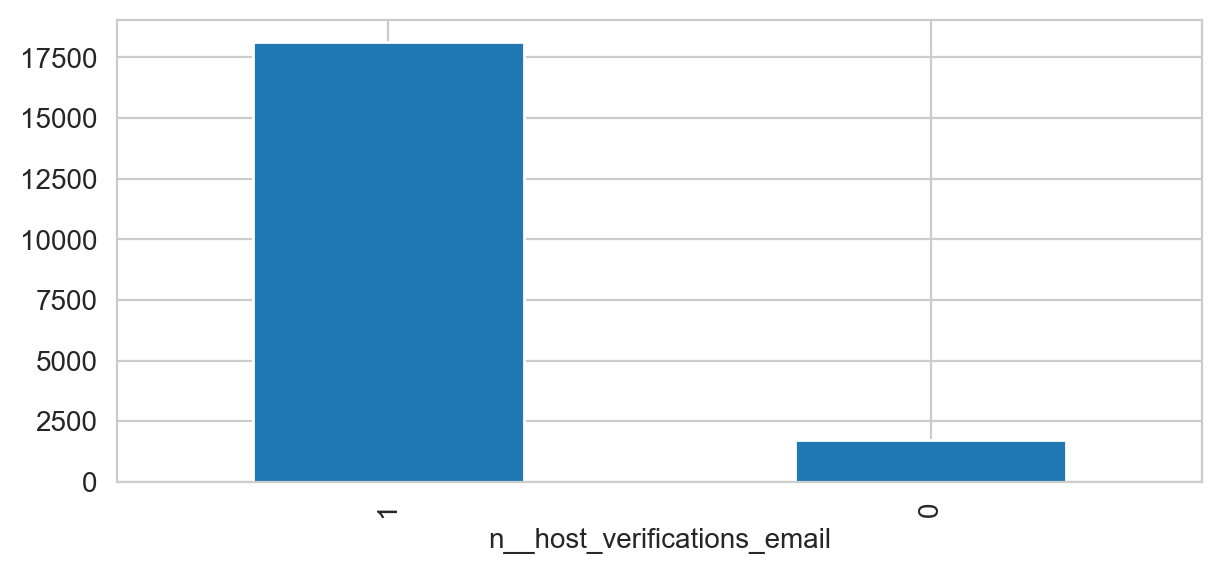

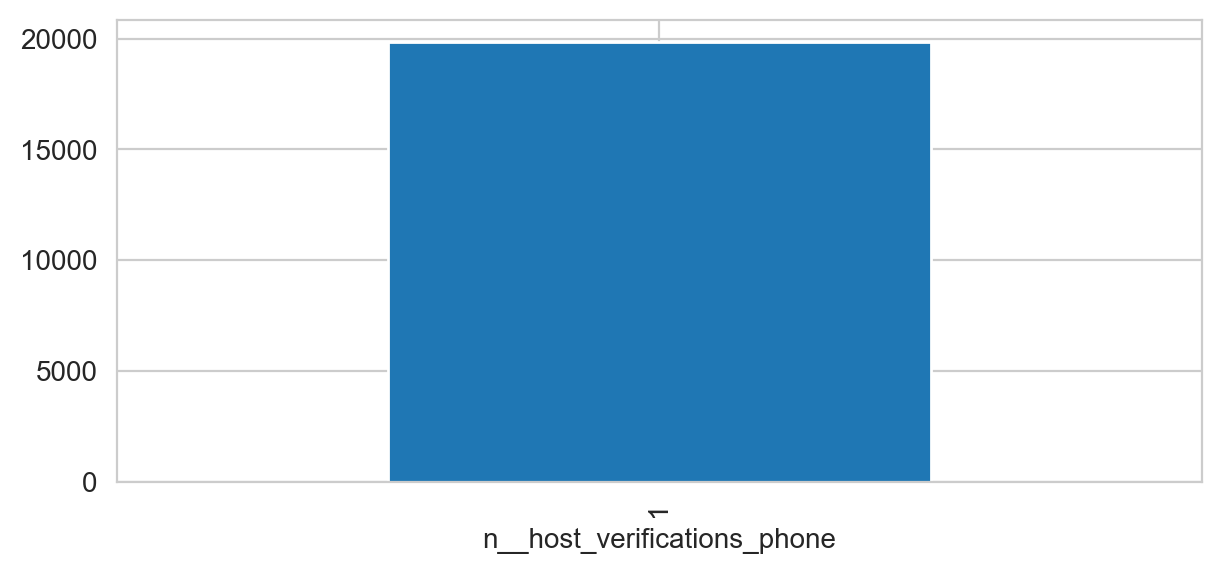

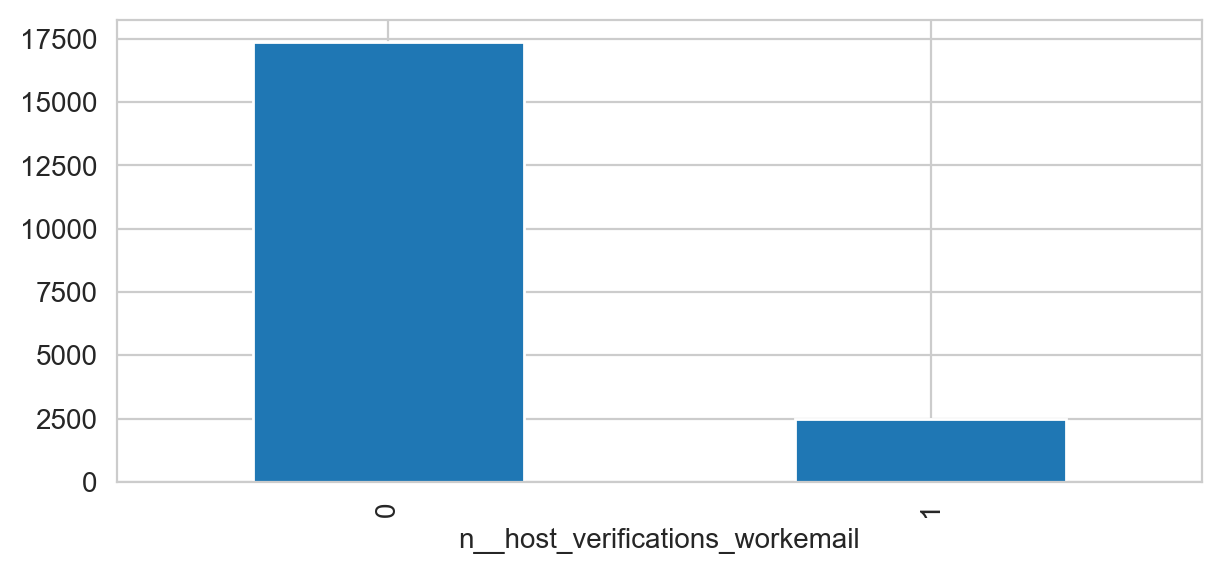

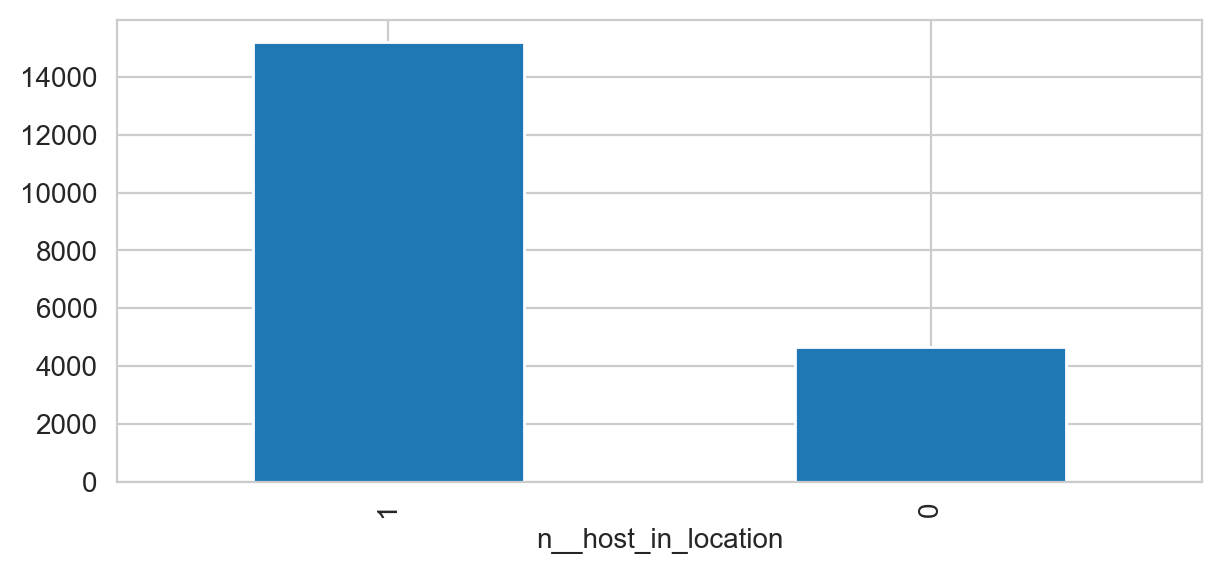

In [149]:
for x in var_disc:
    plt.figure(figsize=(7, 3))
    listings[x].value_counts().plot(kind='bar')
    plt.show()

In [150]:
# ariable categoricas que solo tienen una "categoria" o un valor unico
unarias = [v for v, cont in zip( var_disc, [ listings[v].unique().shape[0] for v in var_disc ] ) if cont == 1]
unarias

['n__host_name',
 'n__host_has_profile_pic',
 'n__host_identity_verified',
 'n__has_availability',
 'n__host_verifications_phone']

In [151]:
var_disc = [ _ for _ in var_disc if _ not in unarias]
var_disc

['n__host_response_time',
 'n__host_is_superhost',
 'n__neighbourhood_cleansed',
 'n__property_type',
 'n__room_type',
 'n__host_verifications_email',
 'n__host_verifications_workemail',
 'n__host_in_location']

In [152]:
listings[var_disc].isnull().sum() / len(listings) *100

n__host_response_time             0.00
n__host_is_superhost              0.00
n__neighbourhood_cleansed         0.00
n__property_type                  0.00
n__room_type                      0.00
n__host_verifications_email       0.00
n__host_verifications_workemail   0.00
n__host_in_location               0.00
dtype: float64

## Variable objetivo discreta

In [153]:
listings.shape

(19859, 104)

In [154]:
listings[ ['availability_30', 'availability_60', 'availability_90', 'availability_365'] ].describe(percentiles=[0.01, .1, .25, .5, .75, .99])

availability_30  availability_60  availability_90  availability_365
count        19,859.00        19,859.00        19,859.00         19,859.00
mean             13.95            35.78            59.97            237.94
std              10.27            19.47            27.87            116.38
min               0.00             0.00             0.00              0.00
1%                0.00             0.00             0.00              0.00
10%               0.00             1.00             8.00             63.00
25%               4.00            21.00            47.00            141.00
50%              14.00            40.00            69.00            269.00
75%              23.00            52.00            82.00            347.00
99%              30.00            60.00            90.00            365.00
max              30.00            60.00            90.00            365.00

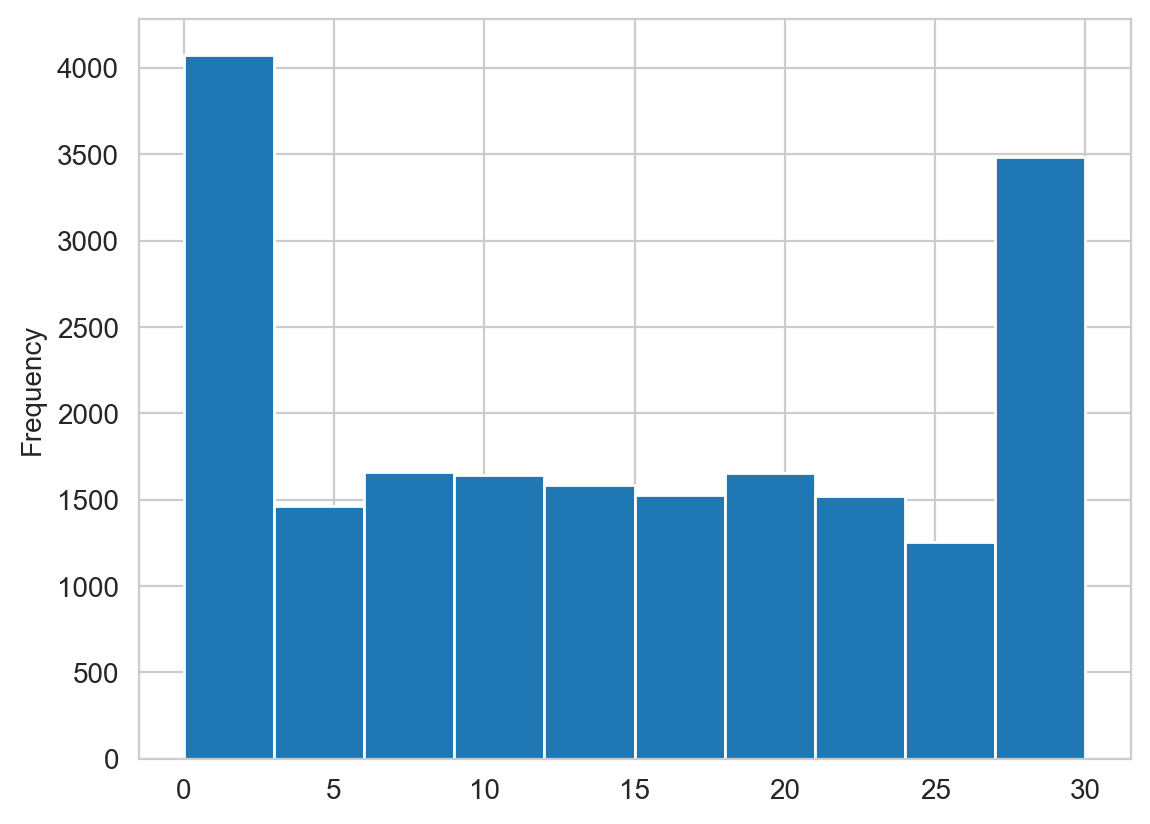

In [155]:
listings['availability_30'].plot(kind='hist')
plt.show()

In [156]:
listings[listings['availability_30'] > 0][['id', 'availability_30', 'availability_60', 'availability_90', 'availability_365']].sample(3)

id  availability_30  availability_60  availability_90  \
726               12807418               15               45               75   
17397  1257976552586808527               25               55               85   
12792   964243085801059479               15               35               62   

       availability_365  
726                 251  
17397               360  
12792               229

In [157]:
#df = calendar[calendar['listing_id'] == 1135456540933287551]
#plt.figure(figsize=(15, 3))
#plt.plot(df['date'], df['available'])
#plt.show()

In [158]:
listings[listings['id'] == 1135456540933287551][['id', 'availability_30', 'availability_60', 'availability_90', 'availability_365']]

id  availability_30  availability_60  availability_90  \
15205  1135456540933287551                9               35               65   

       availability_365  
15205               248

In [159]:
listings[listings['id'] == 1135456540933287551][['availability_30', 'availability_60', 'availability_90', 'availability_365']].sum(axis=1)

15205    357
dtype: int64

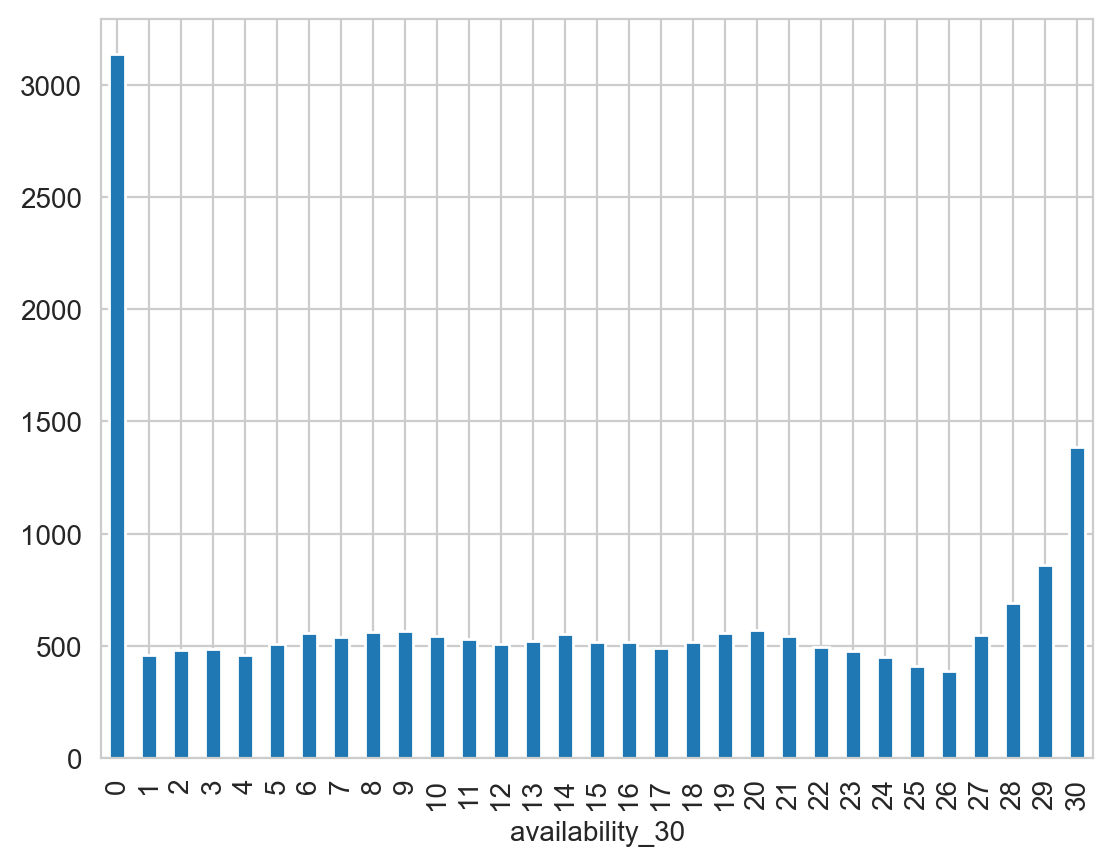

In [160]:
listings['availability_30'].value_counts().sort_index().plot(kind='bar')
plt.show()

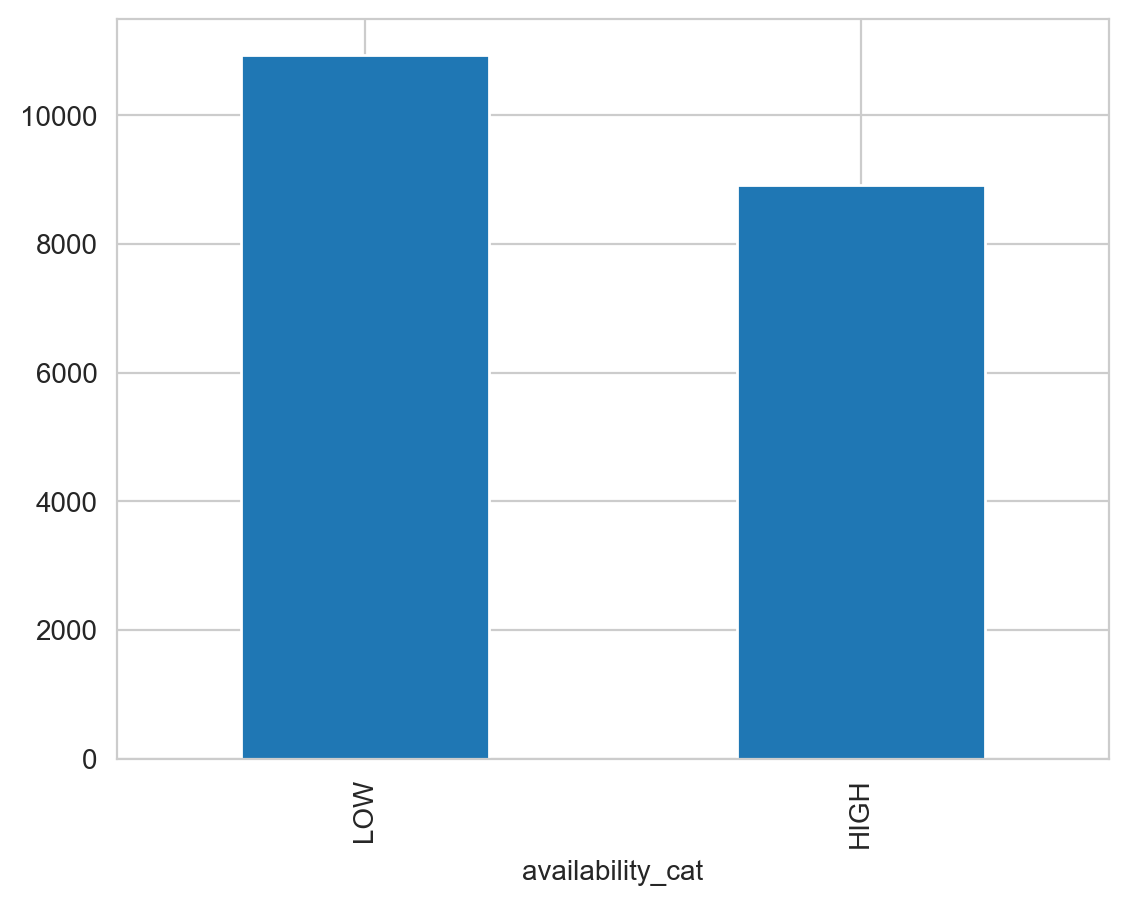

In [161]:
listings['availability_cat'] = listings['availability_30'].map(lambda x: 'HIGH' if x > 15 else 'LOW')
listings['availability_cat'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

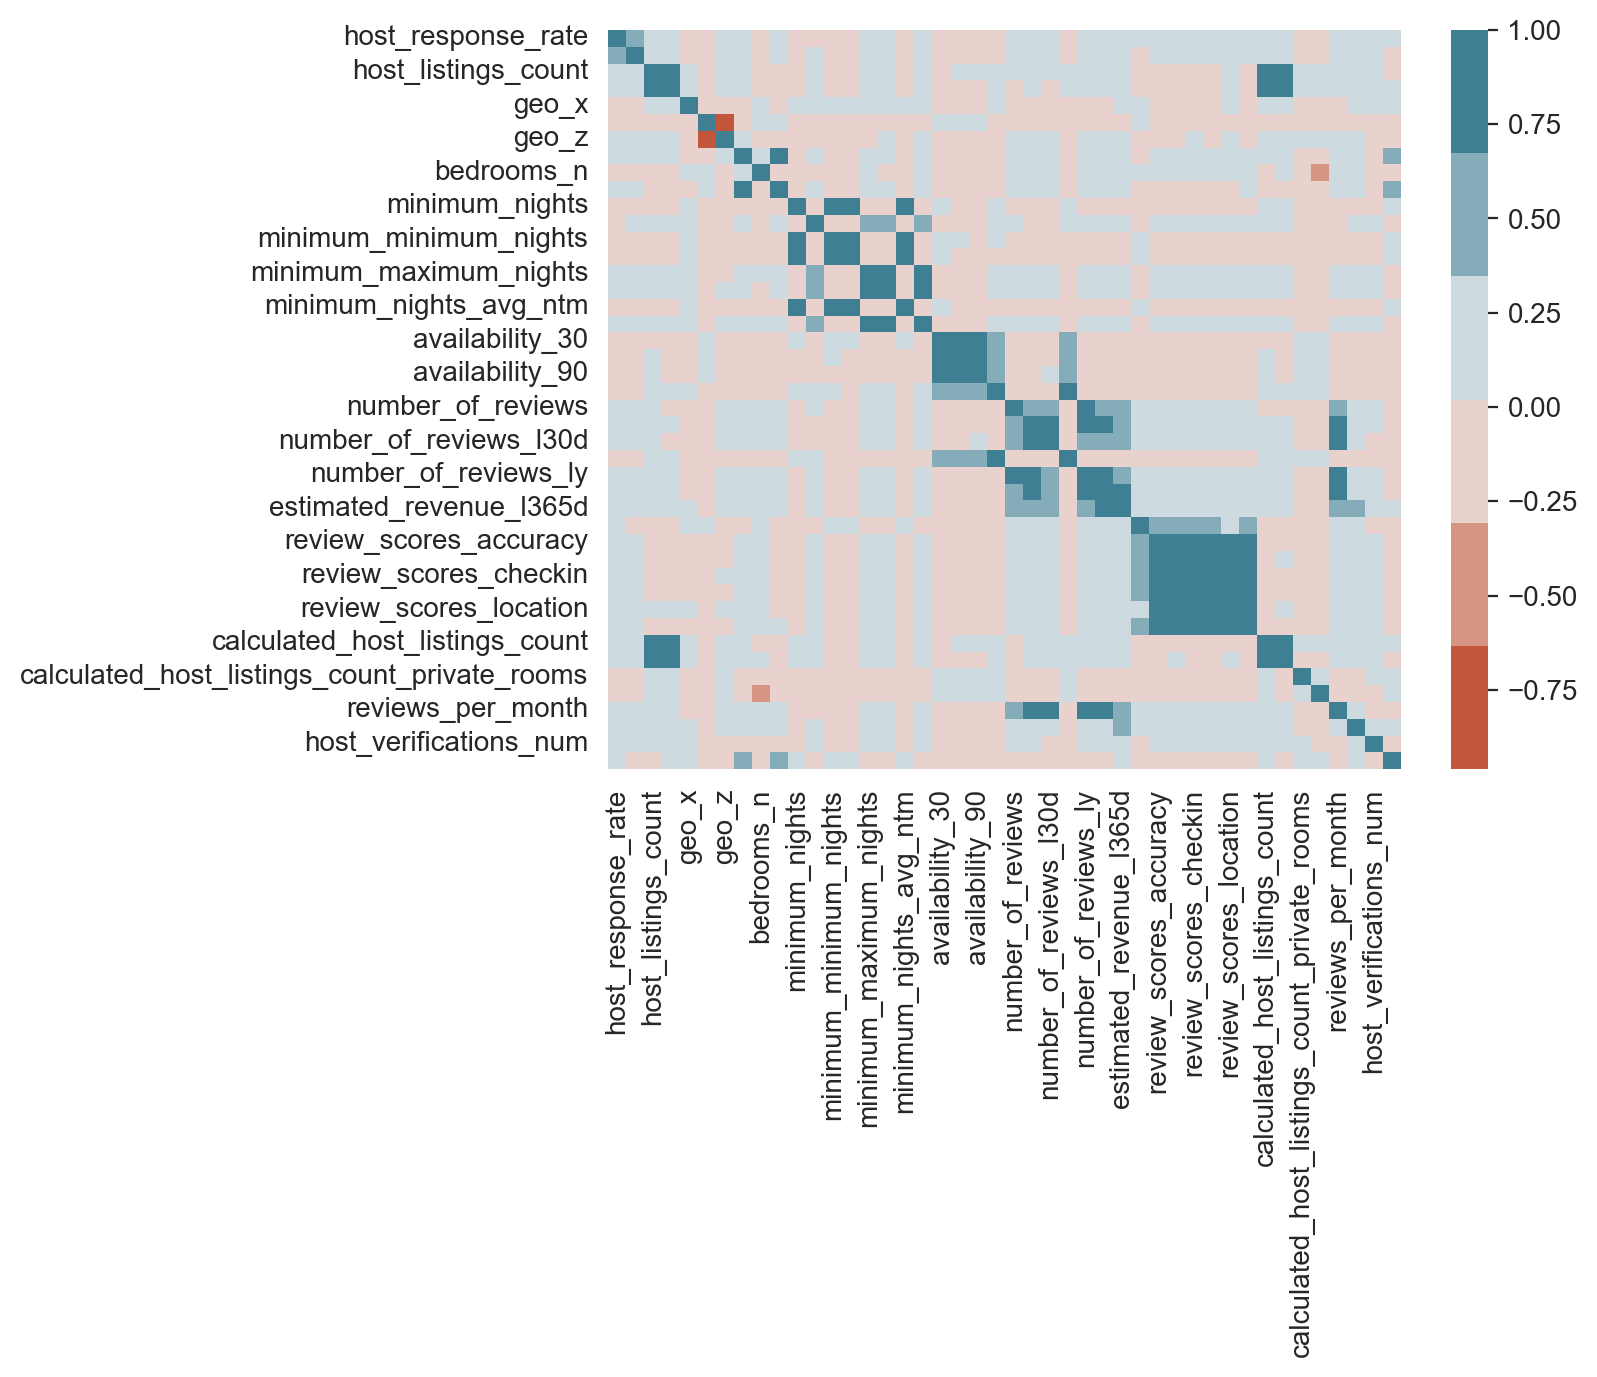

In [165]:
sns.heatmap(listings[var_cont].corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220))

# Modelos

## Regresión

In [ ]:
# Preparacion de sets
X = listings.drop( columns=var_disc)[var_cont].join(pd.get_dummies(listings[var_disc], dtype='int', drop_first=True))
y = listings[var_obj_num]

In [ ]:
X.columns

In [ ]:
var_disc

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X.sample(5)

In [ ]:
y.sample(5)

In [ ]:
kb = SelectKBest( k=30, score_func=f_regression )
kb.fit(X, y)

In [ ]:
kb.get_feature_names_out()

In [ ]:
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
ls_best

In [ ]:
X = pd.DataFrame(kb.transform(X), columns=ls_best)
X

#### Conjunto de entrenamiento y validacion

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.sample(5)

In [ ]:
y_train.sample(5)

### Regresion lineal

In [ ]:
from sklearn.linear_model import ElasticNet
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
linreg.score(X_train, y_train)

In [ ]:
ls_scores = cross_val_score(cv = 4, estimator=linreg, X=X_train, y=y_train)
ls_scores

In [ ]:
print("MEAN", np.mean(ls_scores))
print("STD", np.std(ls_scores))

In [ ]:
# Make predictions.
y_pred = linreg.predict(X_test[X_train.columns])

# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f"Mean Absolute Error: {mae:.4f}")

In [ ]:
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_test - linreg.predict(X_test)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


x_ = np.array(y_test['price'])
y_ = linreg.predict(X_test)[:,0]
# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=x_, y=y_, alpha=0.7)
plt.plot([min(y_test['price']), max(y_test['price'])], [min(y_test['price']), max(y_test['price'])], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [ ]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", linreg.coef_[0][i].round(10))

# Extraer información del modelo
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": linreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [ ]:
X_test.head(5)

In [ ]:
# Iterar sobre las filas de la muestra
for index, row in X_test.sample(5).iterrows():
    print(f"Index: {index}   y = {float(y_test.loc[[index]].values)}")
    # Intercepto
    y_hat=round(float(linreg.intercept_), 6)
    print(y_hat, end='')
    # Coeficientes
    for x,y in zip(linreg.coef_[0], row):
        y_hat += float(x)*float(y)
        print("+(", round(x, 6), "*", y, ")", end='')
    # valor de predicción
    print(" = ", round(y_hat, 6))

## Clasificación